# Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013.Now each product has certain attributes that sets it apart from other products.Same is the case with store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_histogram

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## Reading Data

In [2]:
data_train = pd.read_csv("train_v9rqX0R.csv")
data_test = pd.read_csv("test_AbJTz2l.csv")
data = pd.concat([data_train, data_test],ignore_index=True)

In [3]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### Dimensions of Data

In [4]:
data_train.shape, data_test.shape, data.shape

((8523, 12), (5681, 11), (14204, 12))

The training dataset has 8523 instances and 12 features.

The test dataset has 5681 instances and 11 features since we have to predict Item_Outlet_Sales.

### Features of Data

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


Some of the features have object Dtypes else others have float64 and int64 Dtypes. Some of the features have missing values as well.

In [7]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

## Exploratory Data Analysis

In [8]:
data.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

We will try to visualize the continuous variables using histograms and categorical variables using bar plots

### Univariate Analysis

#### Target Variable

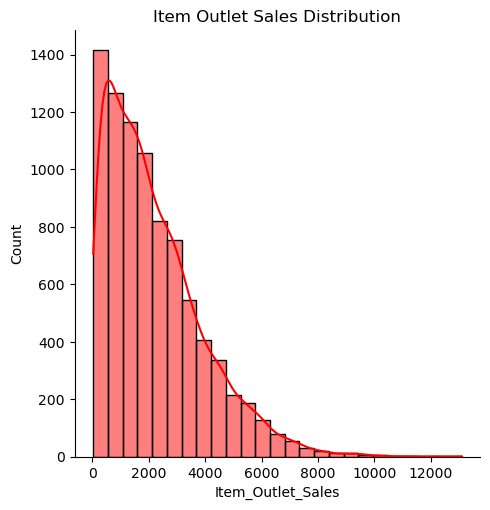

In [9]:
sns.displot(data_train["Item_Outlet_Sales"],color ='red',bins=25,
            kde = True )
plt.title("Item Outlet Sales Distribution")
plt.show()

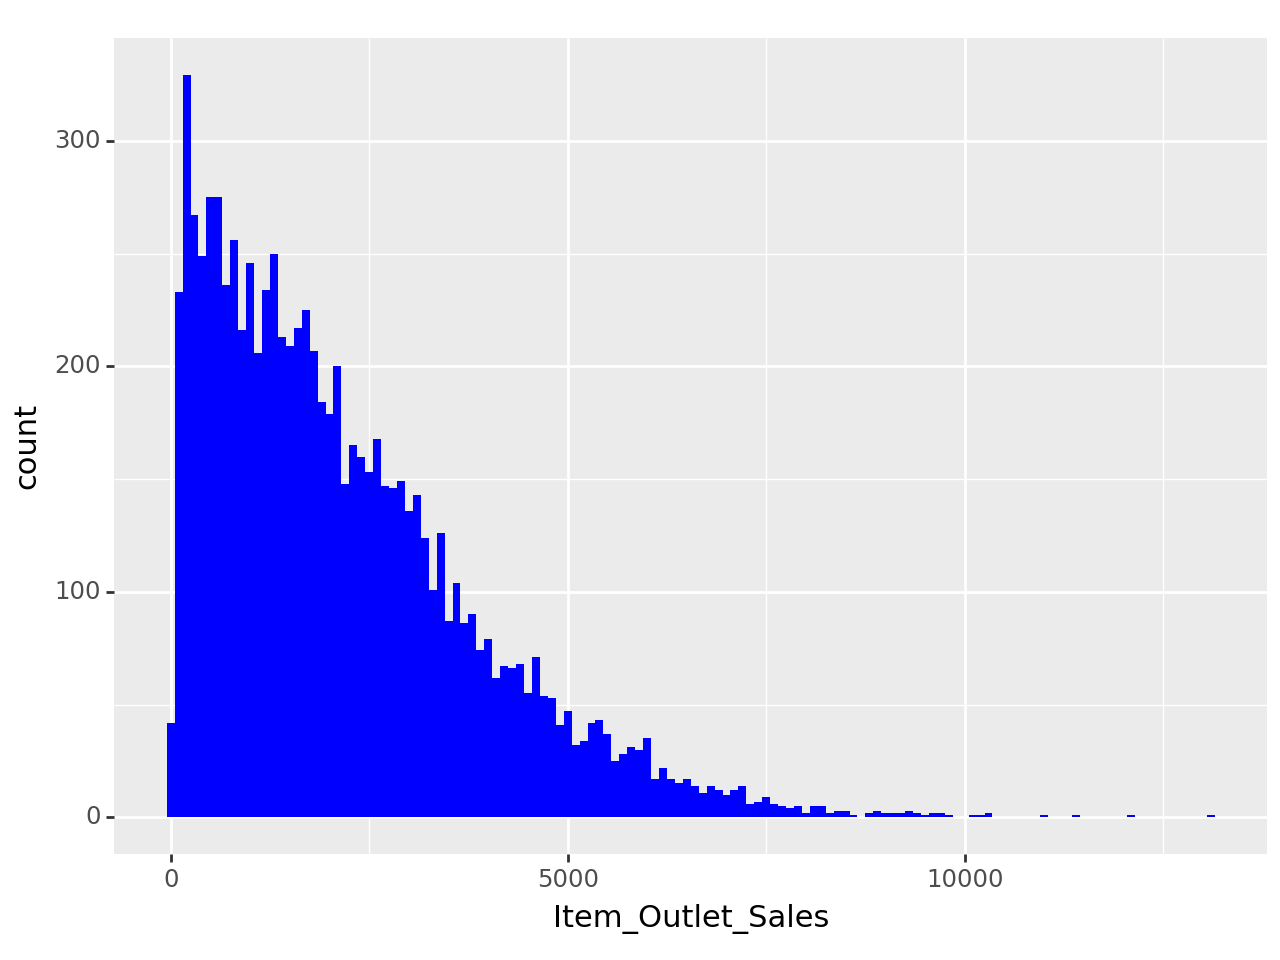

<Figure Size: (640 x 480)>

In [10]:
ggplot(data_train) + geom_histogram(aes("Item_Outlet_Sales"), binwidth=100, 
                                    fill = 'blue')

We can see that it is a right skewed variable and would need some data transformation to treat its skewness.

#### Independent Variables (numeric variables)

C:\Users\Rashi\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 2439 rows containing non-finite values.


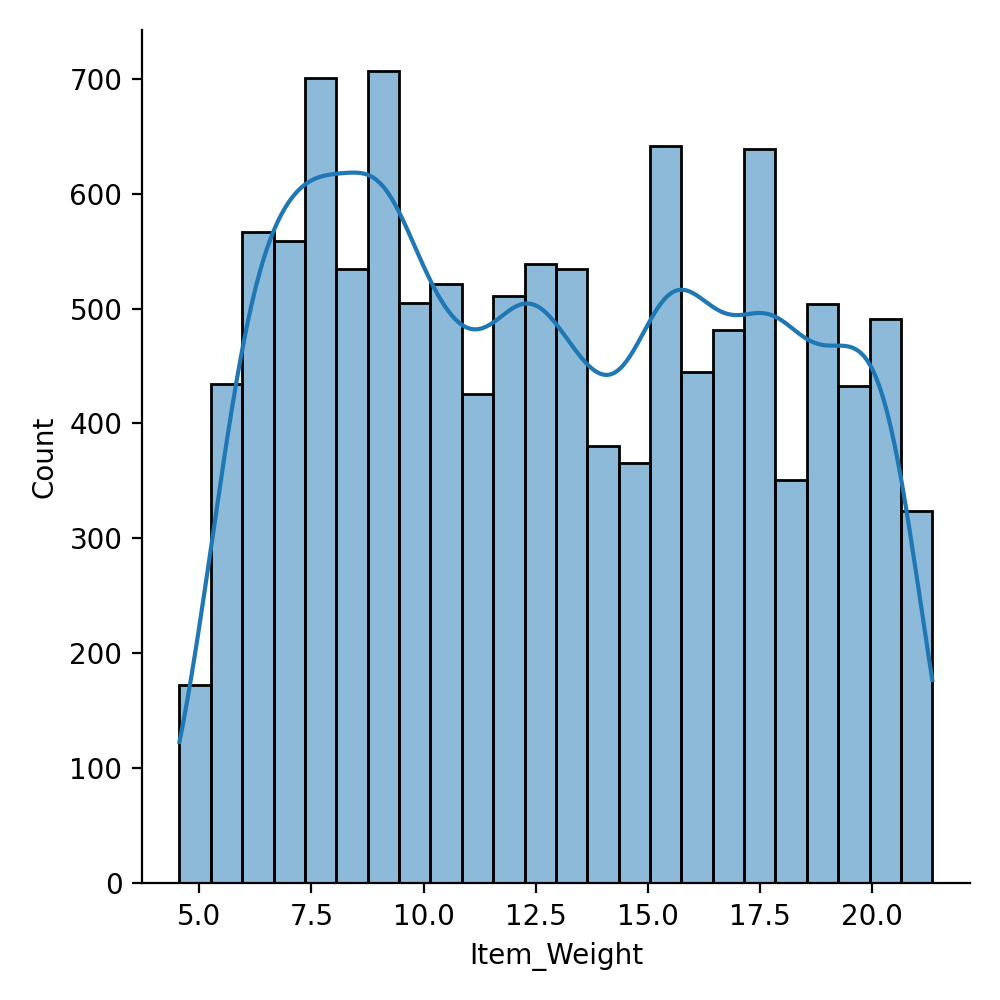

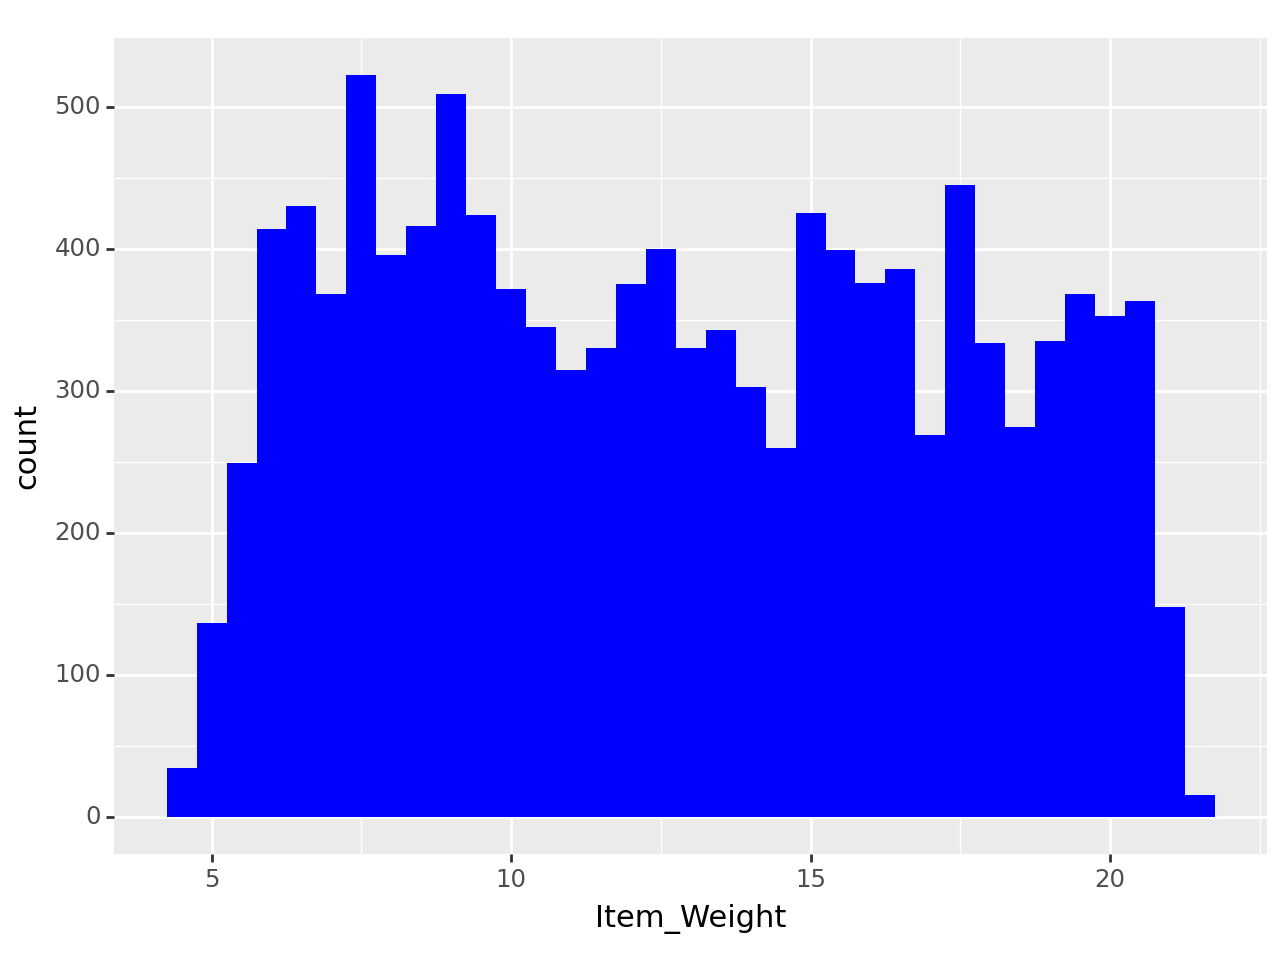

<Figure Size: (640 x 480)>

In [11]:
sns.displot(data["Item_Weight"], kde = True)
ggplot(data) + geom_histogram(aes("Item_Weight"), binwidth = 0.5,
                                    fill = "blue")

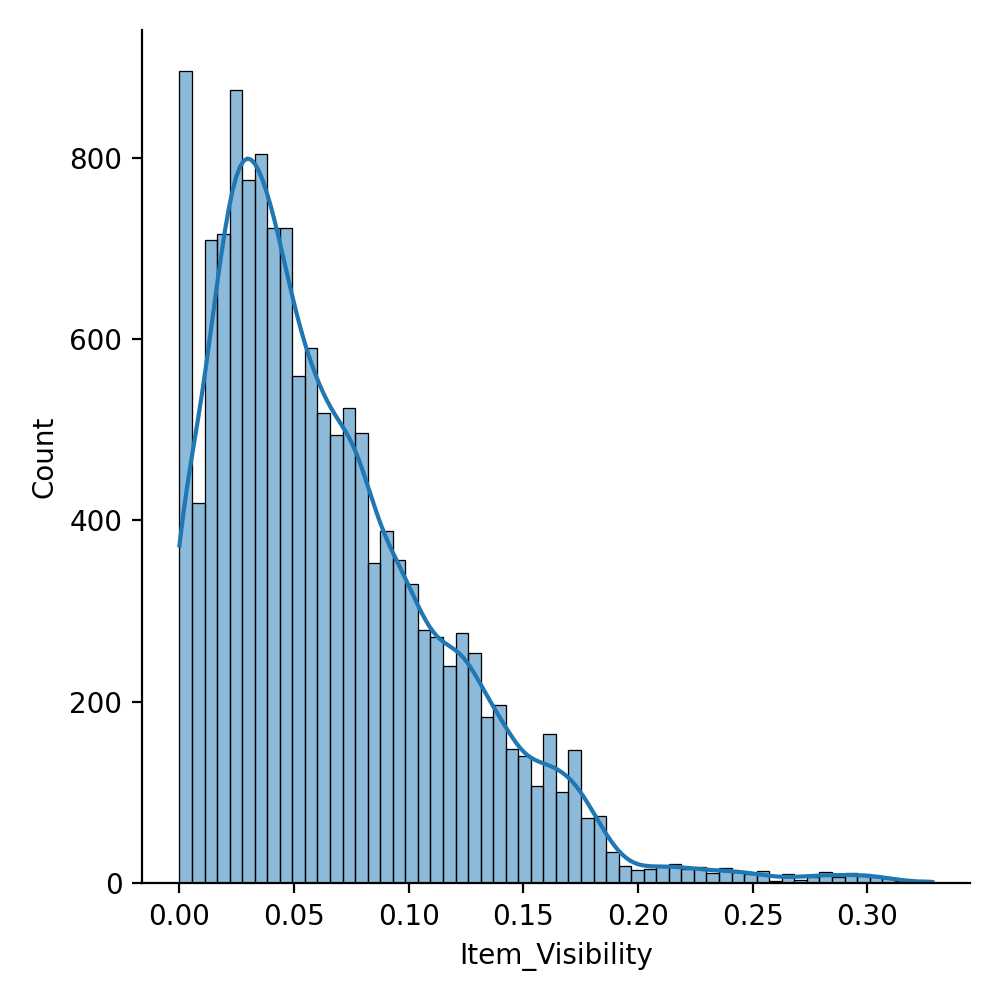

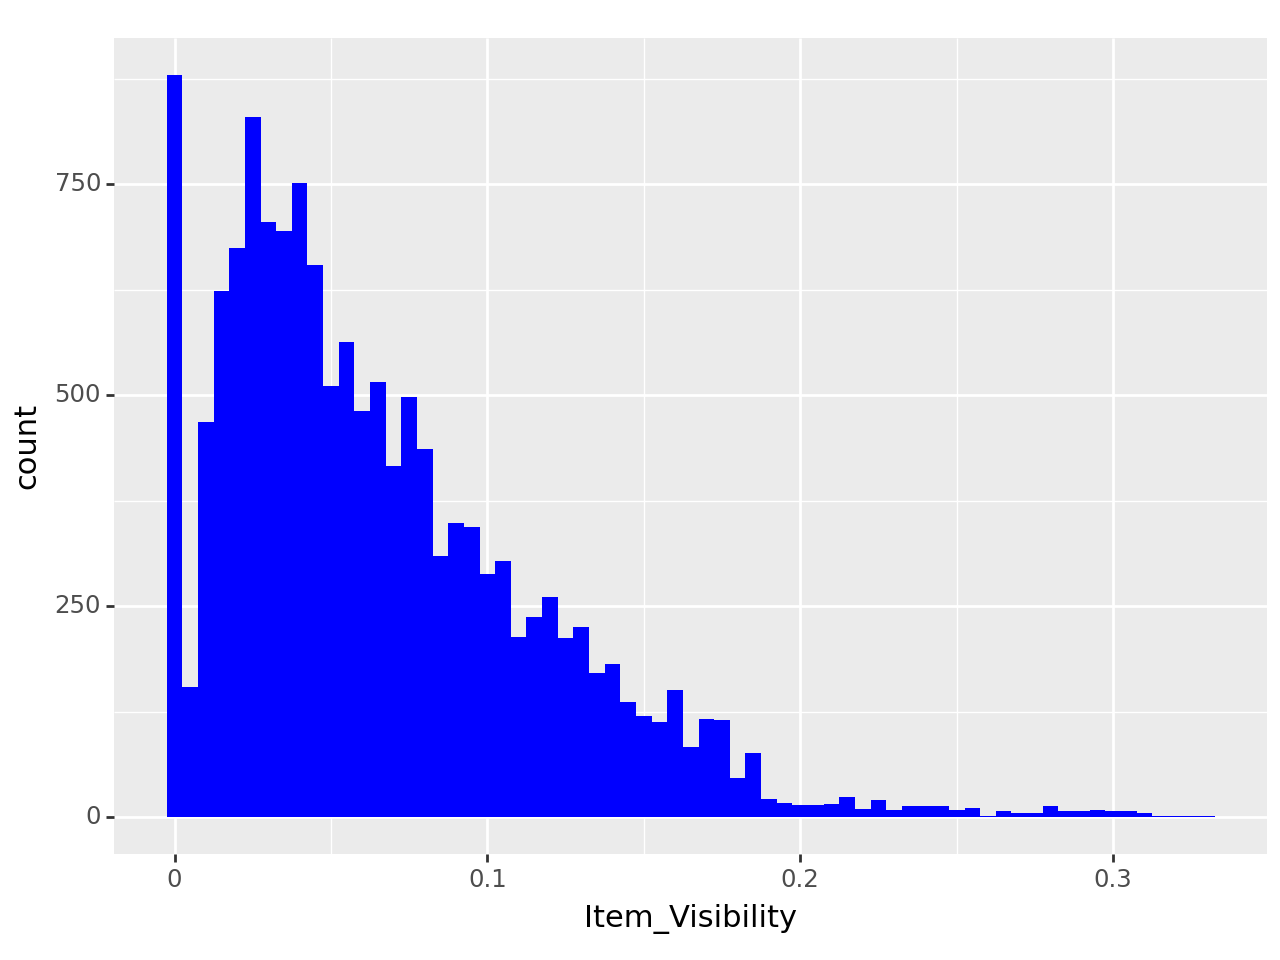

<Figure Size: (640 x 480)>

In [12]:
sns.displot(data["Item_Visibility"], kde = True)
ggplot(data) + geom_histogram(aes("Item_Visibility"), binwidth = 0.005,
                                    fill = "blue")

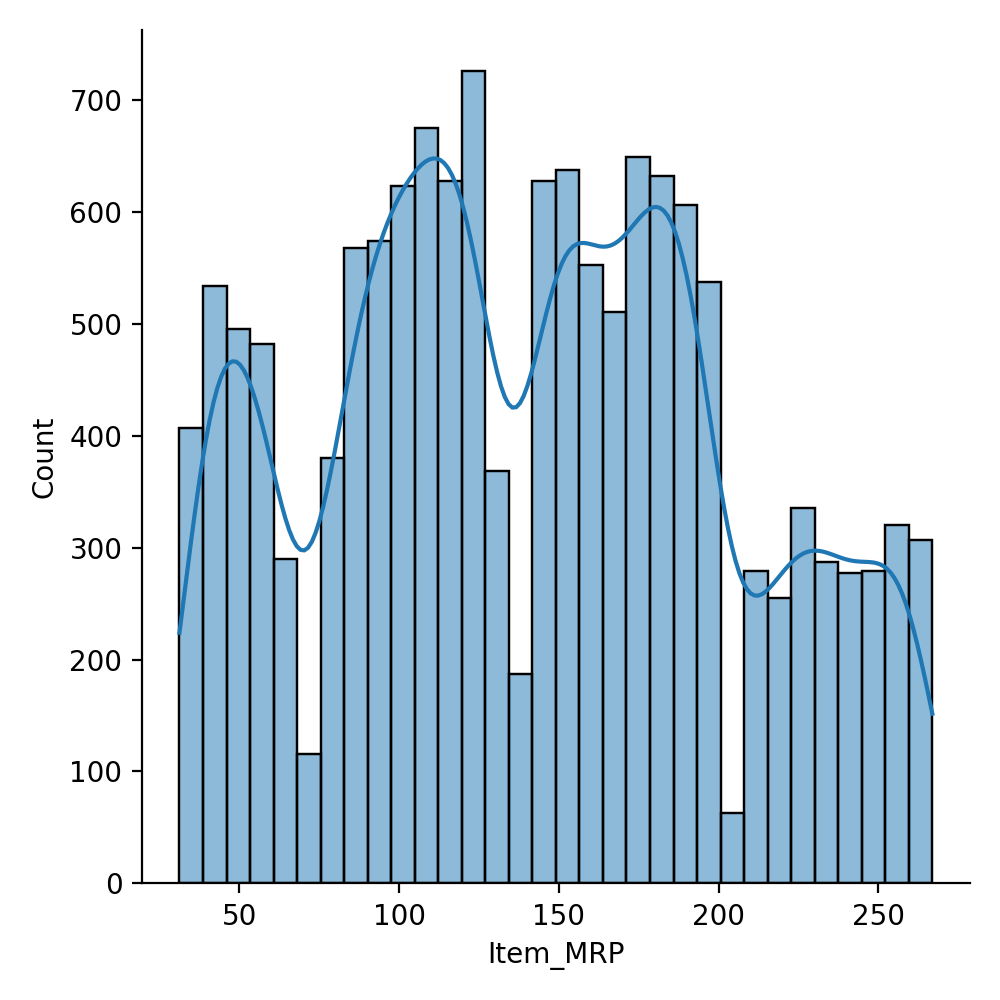

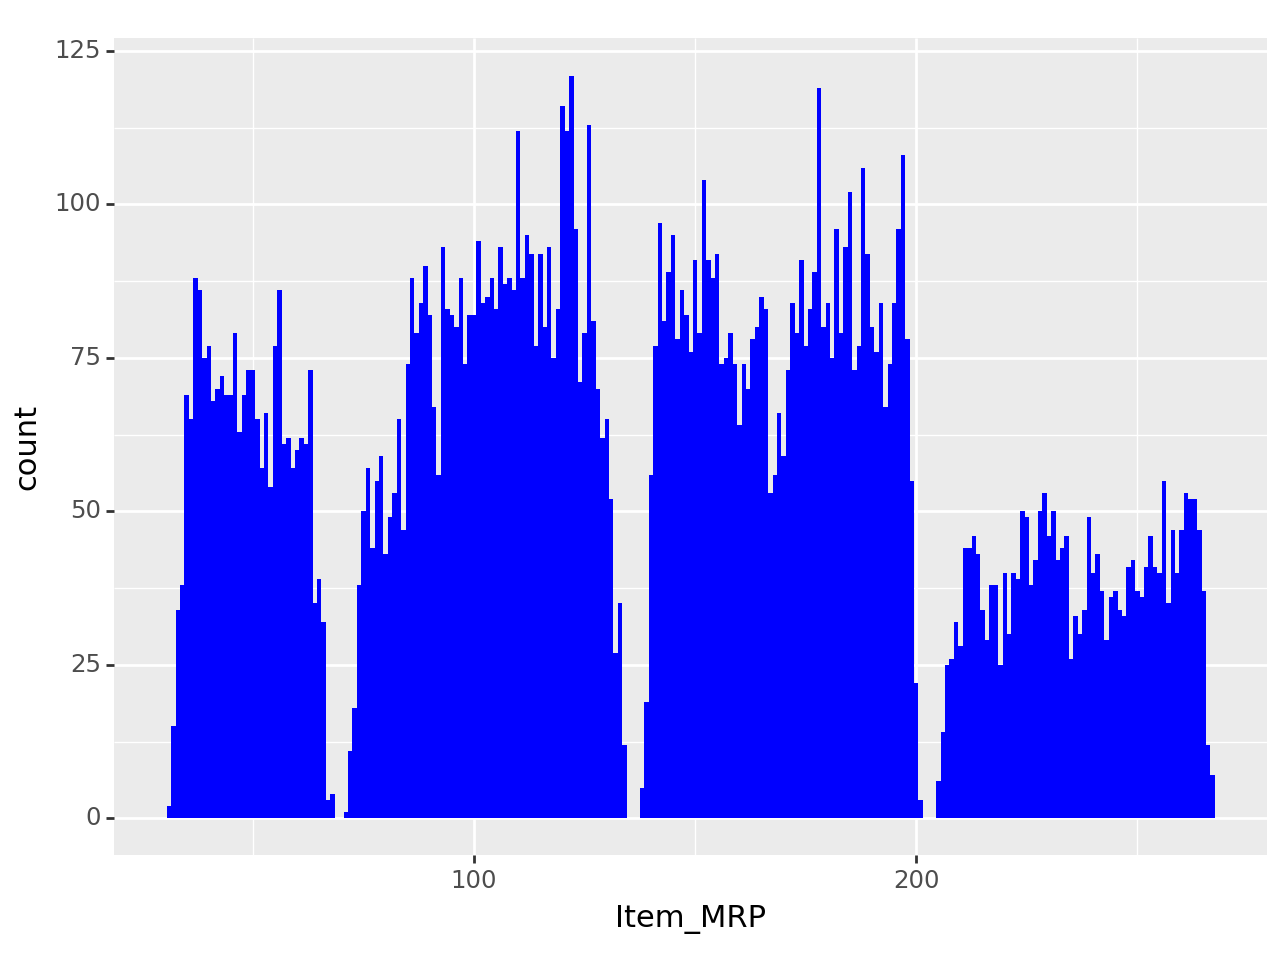

<Figure Size: (640 x 480)>

In [13]:
sns.displot(data["Item_MRP"], kde = True)
ggplot(data) + geom_histogram(aes("Item_MRP"), binwidth = 1,
                                    fill = "blue")

OBSERVATIONS : 

There seems to be no clear-cut pattern in Item_Weight.

Item_Visibility is right-skewed and should be transformed to curb its skewness.

We can clearly see 4 different distributions from Item_MRP.It is an interesting insight.

#### Independent Variables (Categorical Variables)

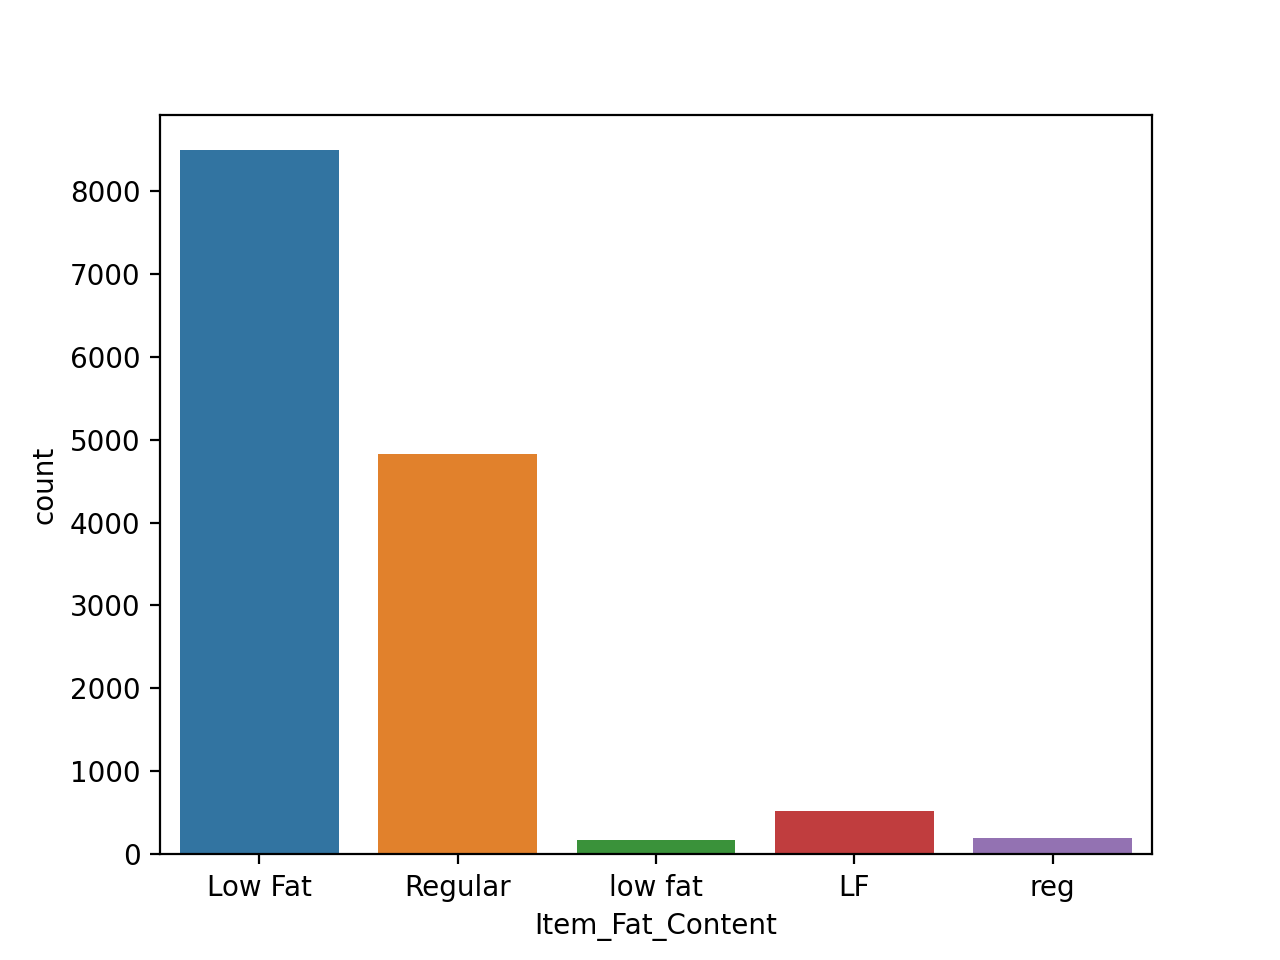

In [14]:
sns.countplot(x=data["Item_Fat_Content"])
plt.show()

In the above figure, category like 'low fat', 'LF' both represent 'Low Fat' category and can be combined into one. Similarly 'reg' and 'regular' can be combined into one category.

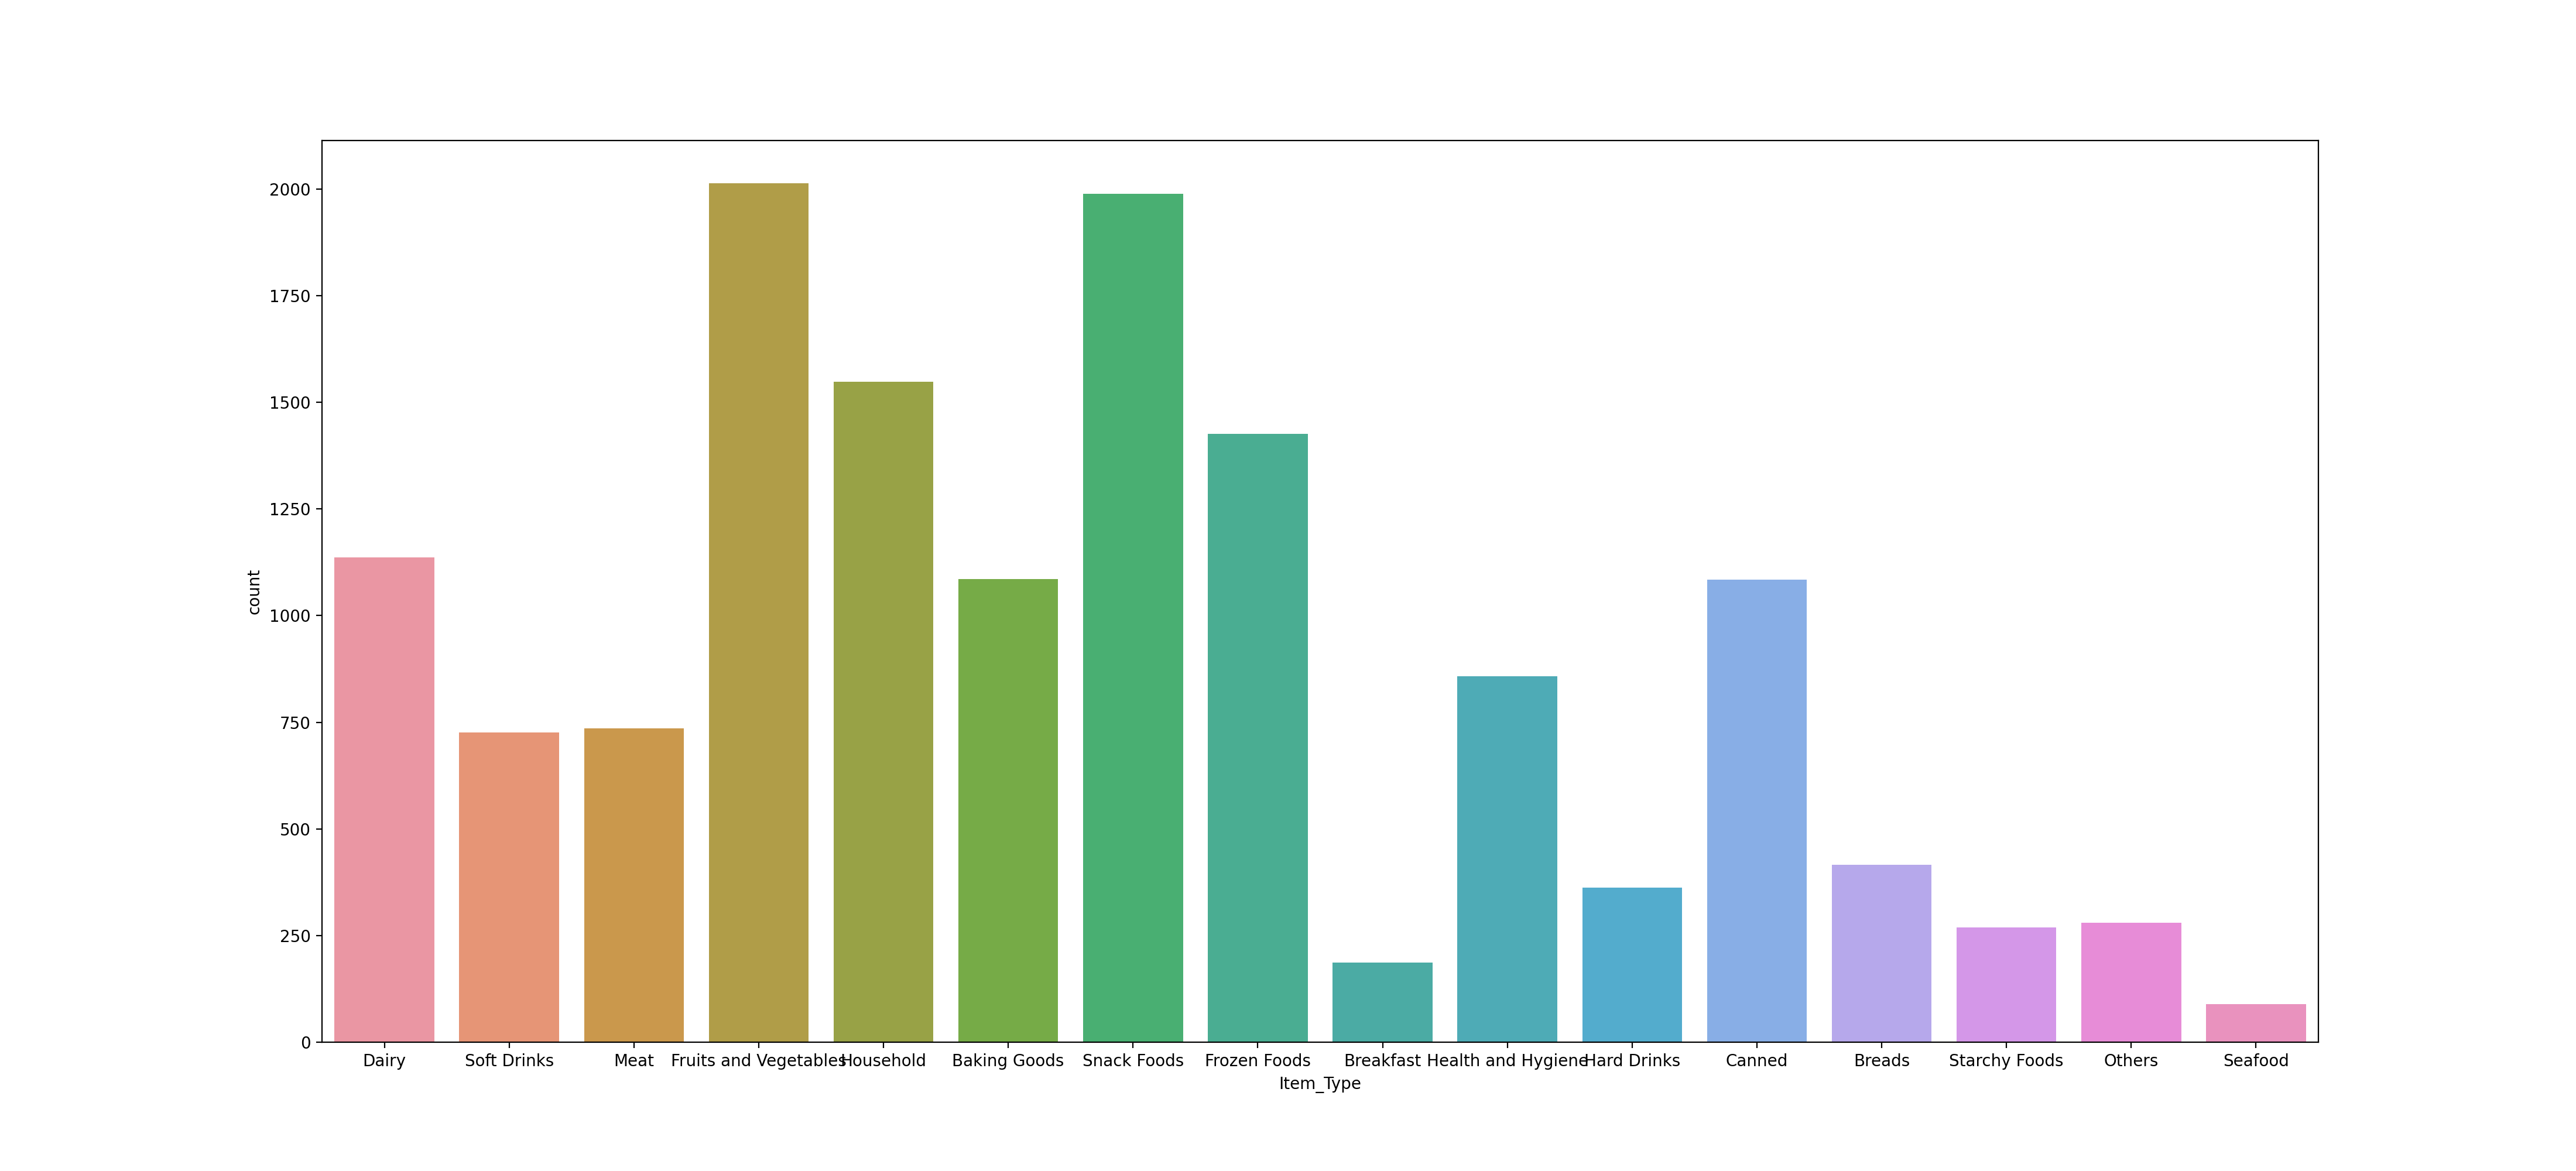

In [15]:
plt.figure(figsize=(22,10))
sns.countplot(x=data["Item_Type"])
plt.show()

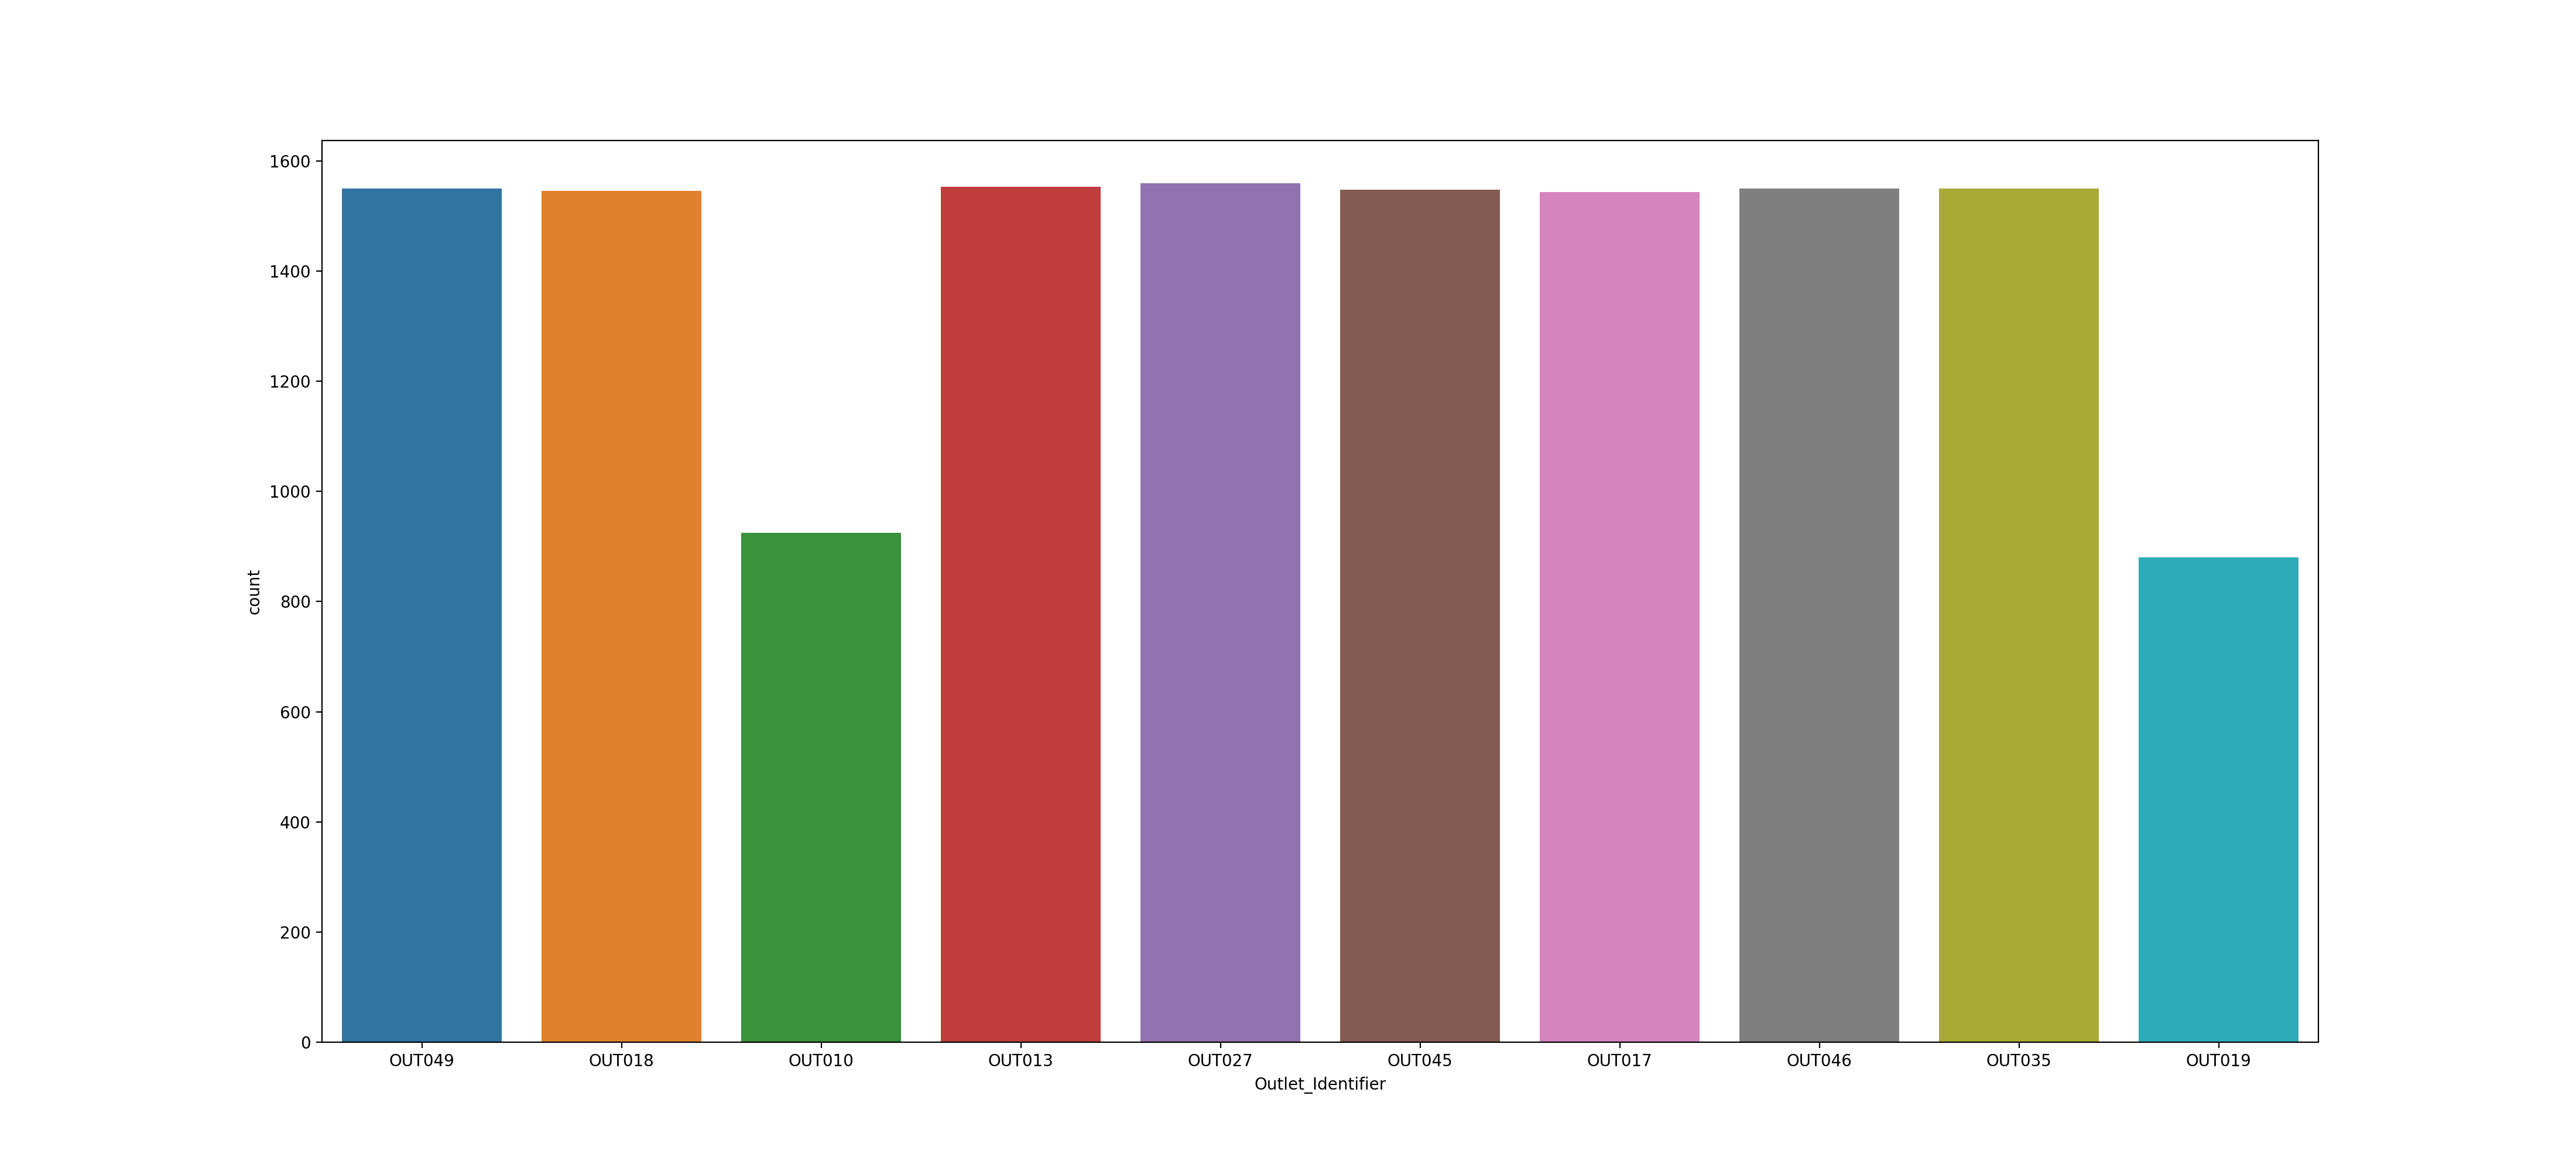

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(x=data["Outlet_Identifier"])
plt.show()

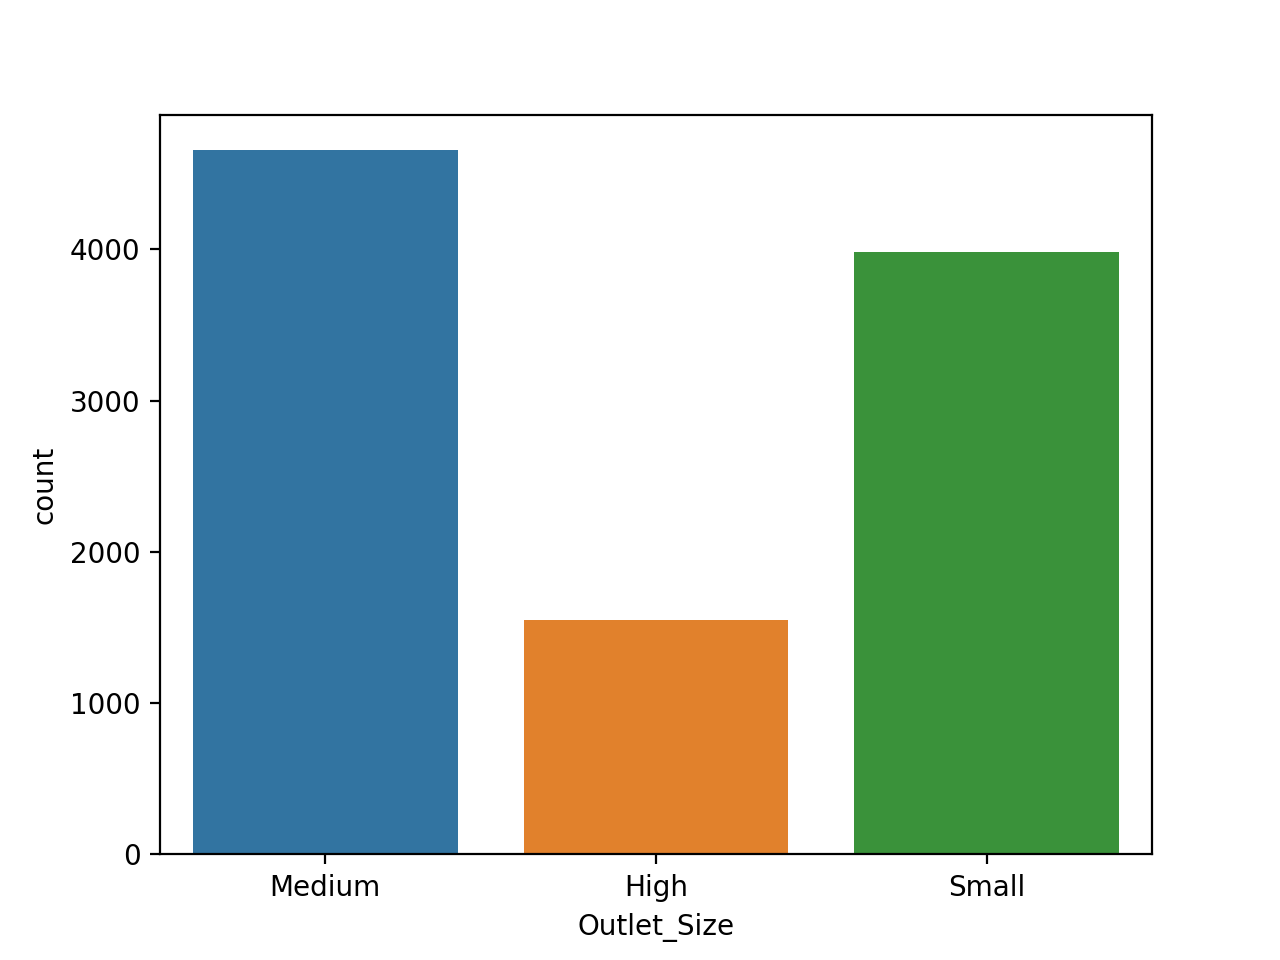

In [17]:
sns.countplot(x=data["Outlet_Size"])
plt.show()

<Axes: ylabel='Outlet_Size'>

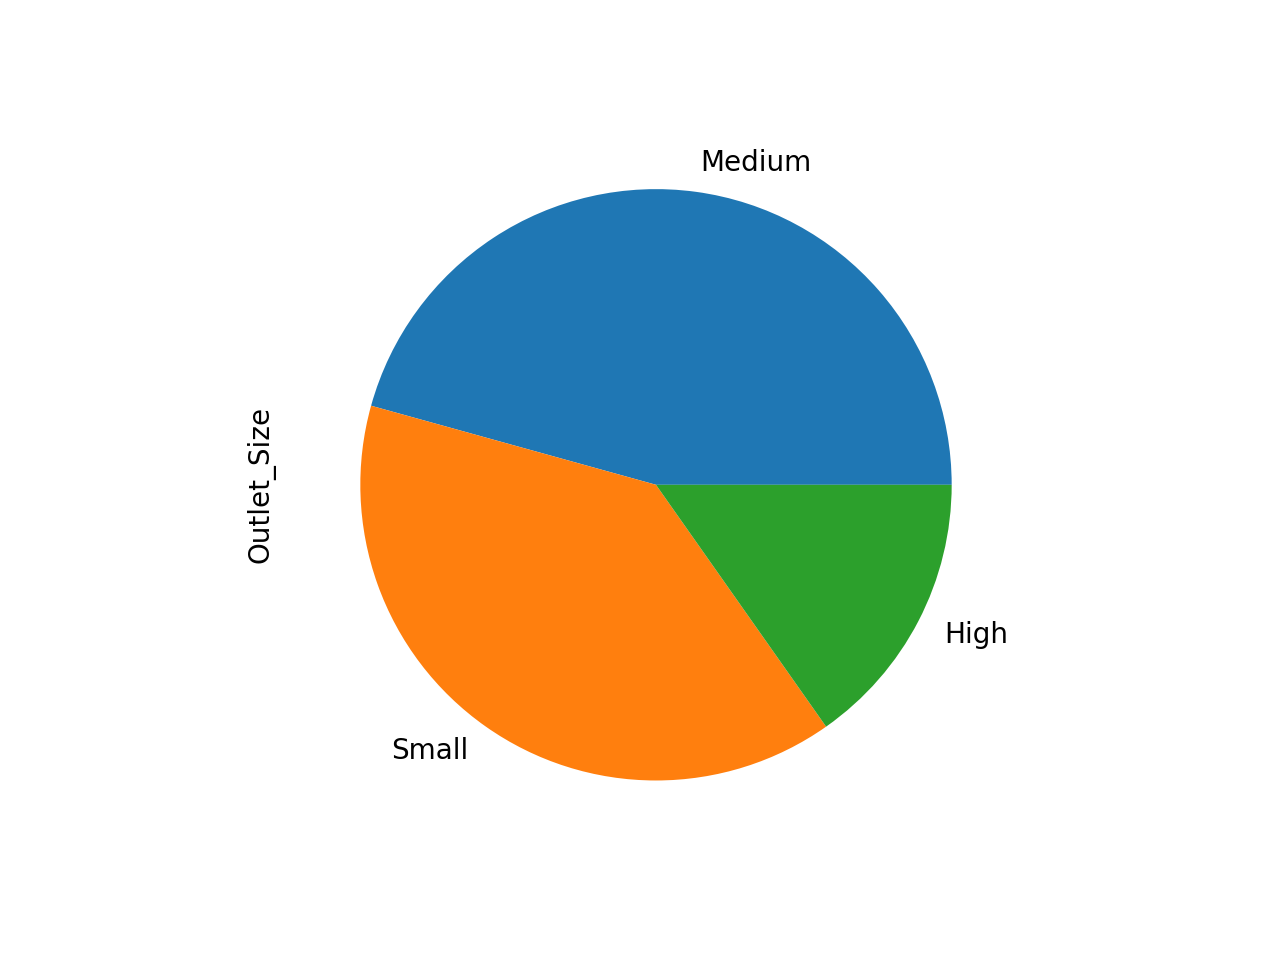

In [18]:
data["Outlet_Size"].value_counts().plot.pie()

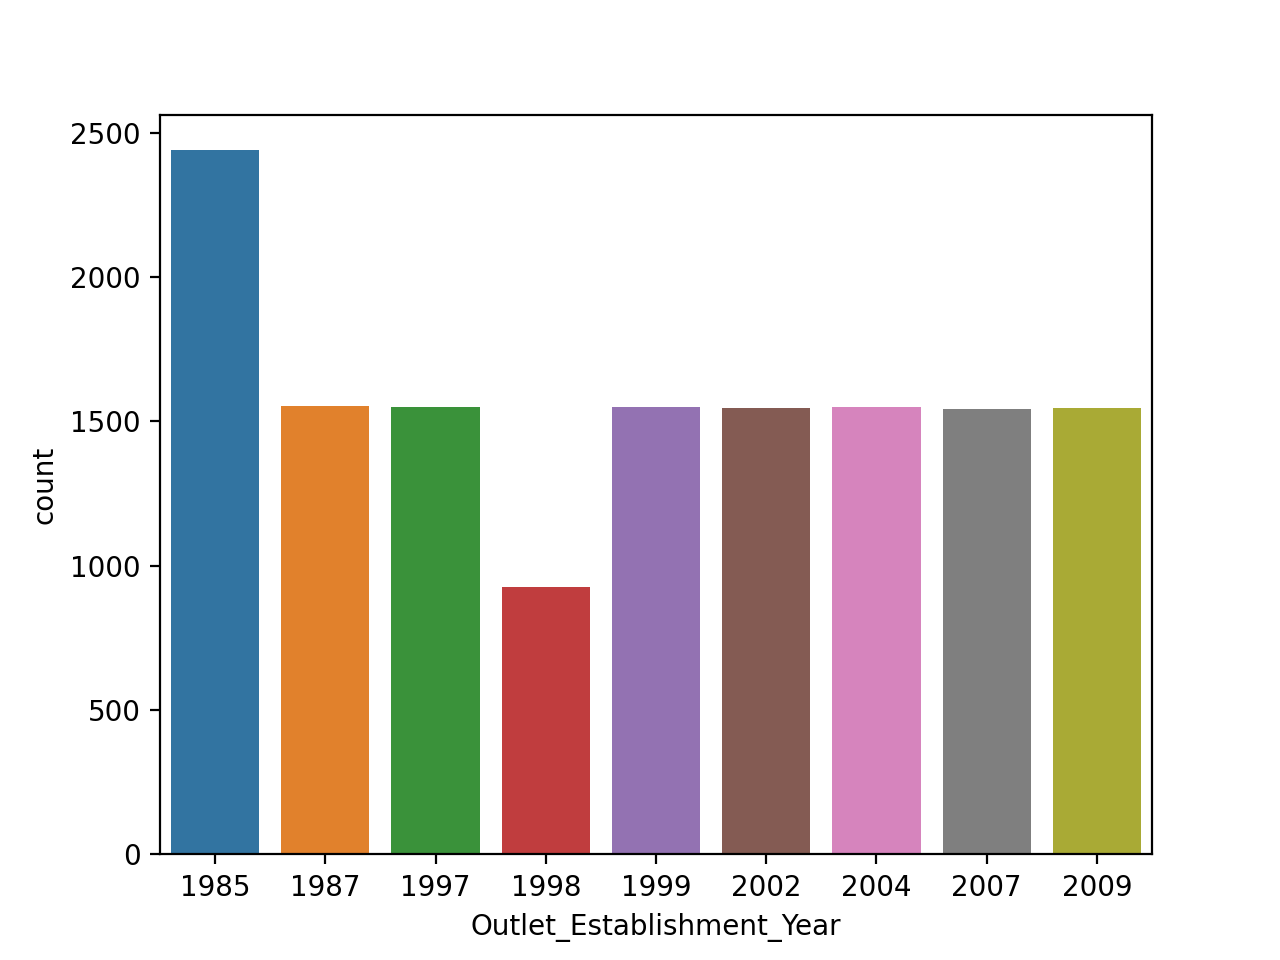

In [19]:
sns.countplot(x=data["Outlet_Establishment_Year"])
plt.show()

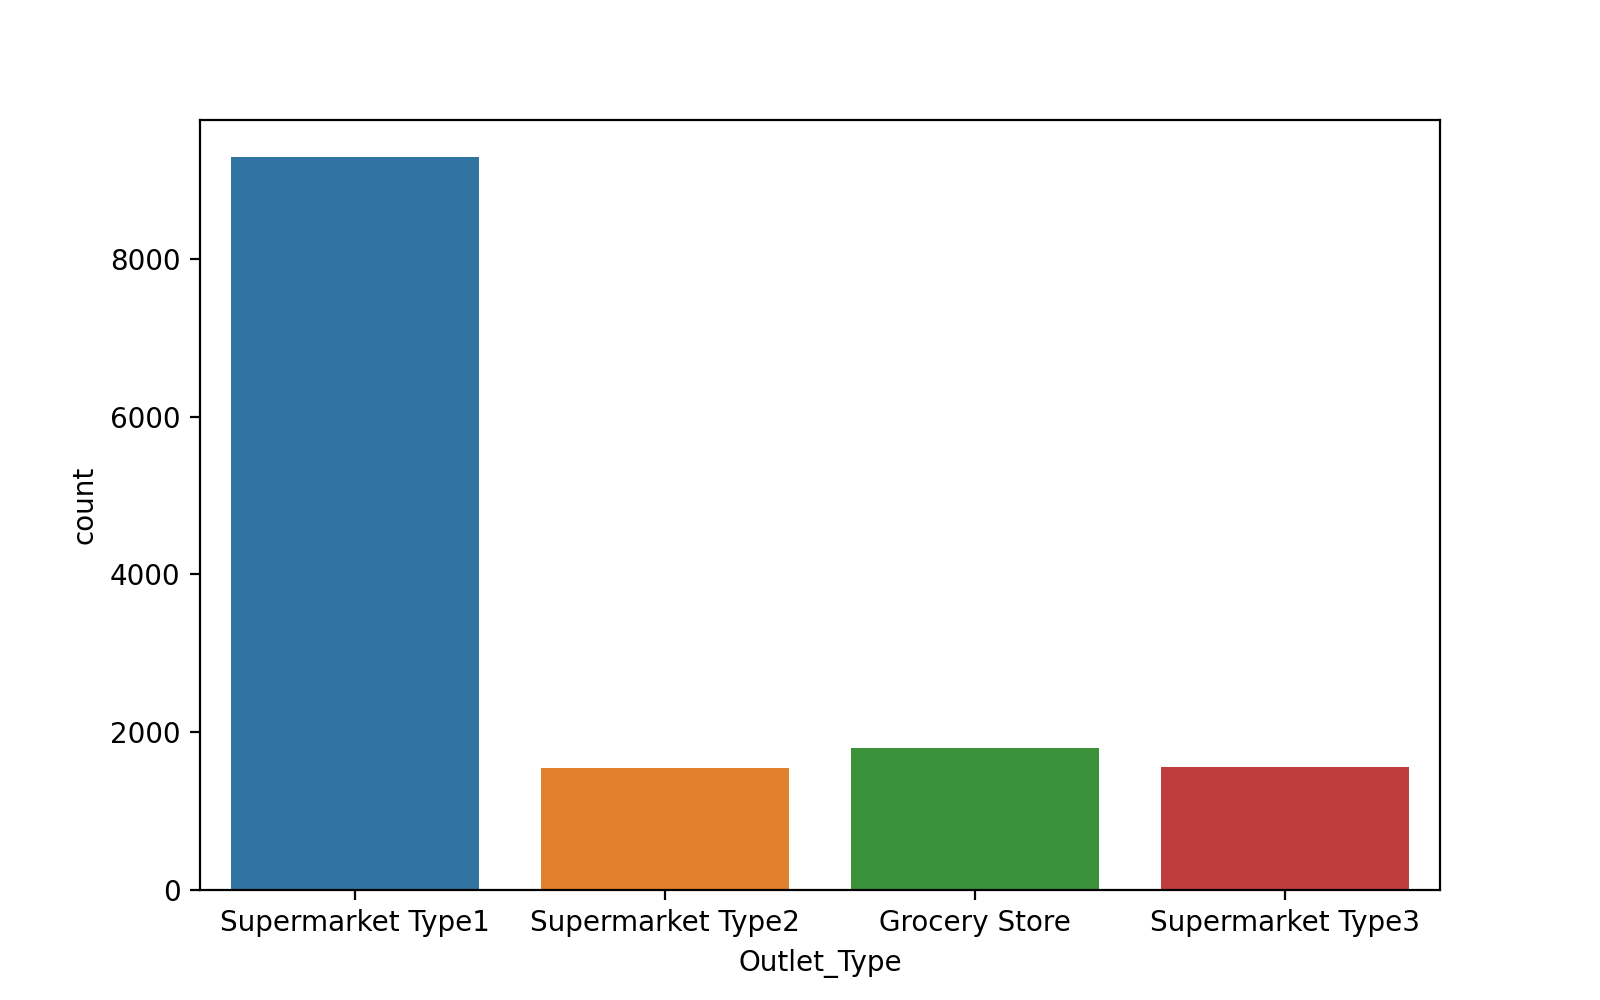

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Outlet_Type"])
plt.show()

We can observe a lesser number of observations in the data for the outlets established in the year 1998 as compared to other years.

Supermarket Type 1 seems to be the most popular category of Outlet_Type

### Bivariate Analysis

We'll explore the independent variable with respect to the target variable.
The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering.

We'll make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.

#### Target Variable VS Independent Numeric Variables

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

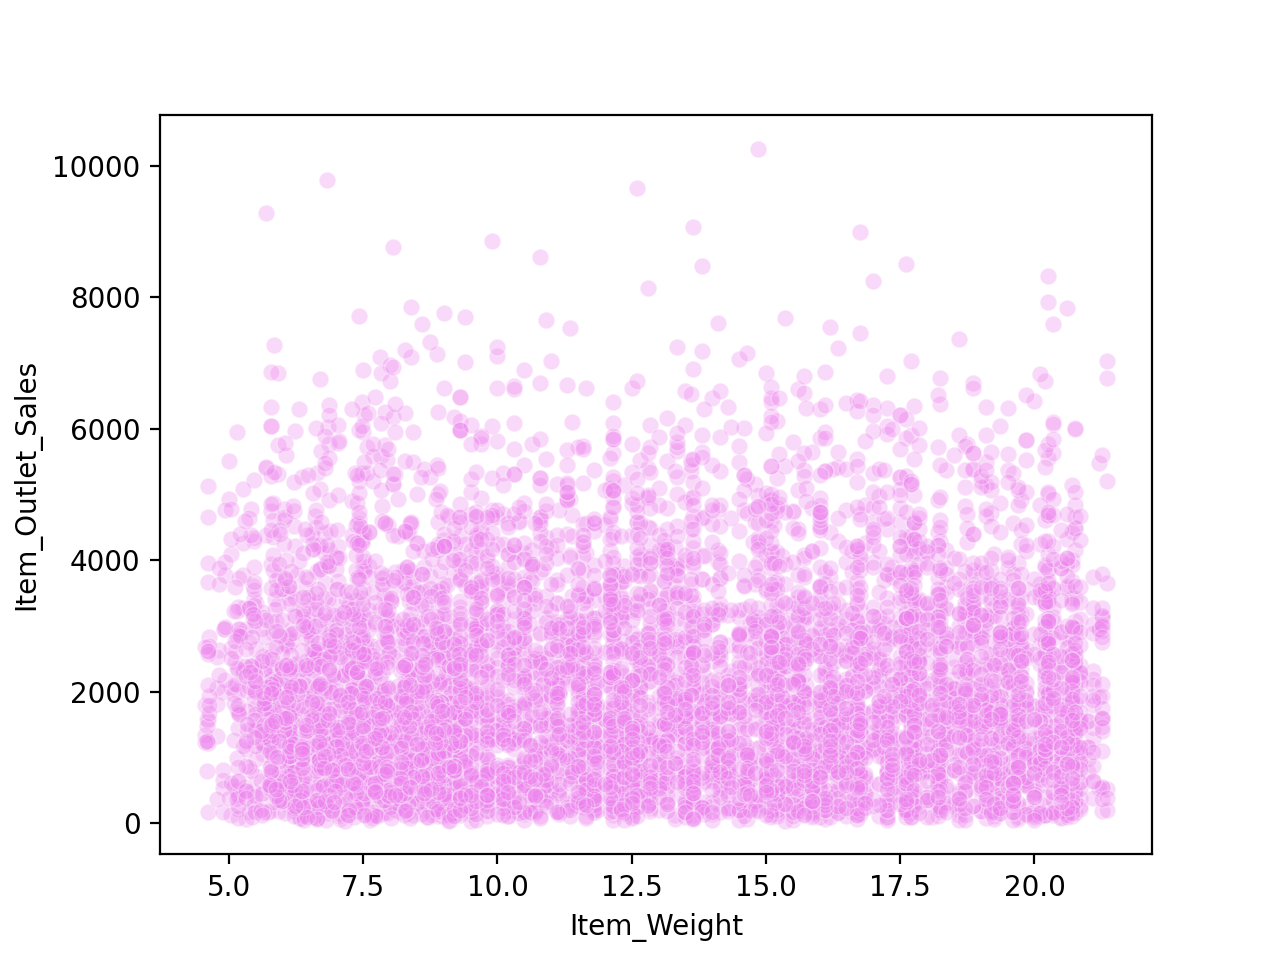

In [21]:
#Item_Weight VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_Weight", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

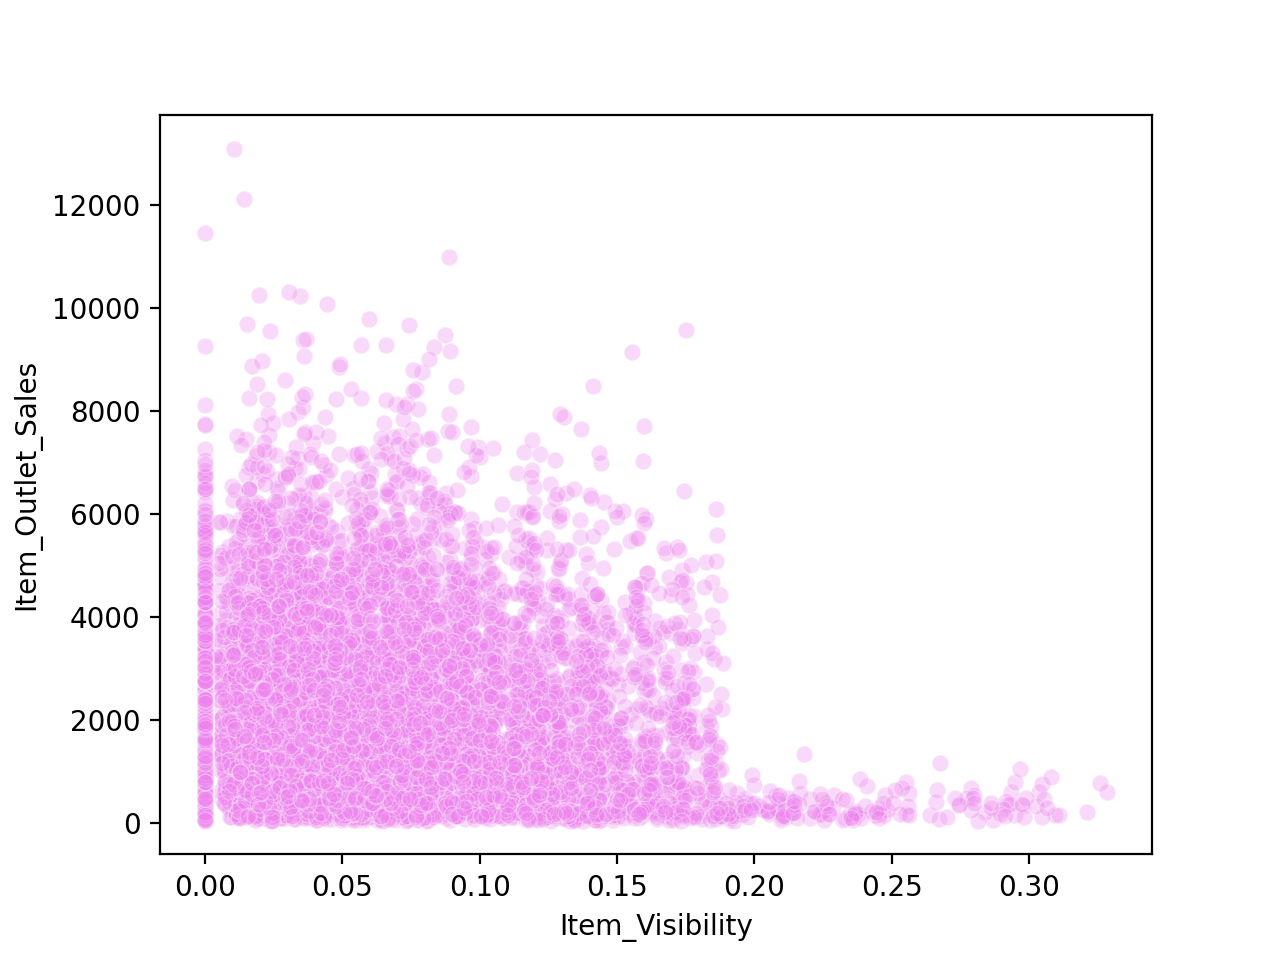

In [22]:
#Item_Visibility VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_Visibility", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

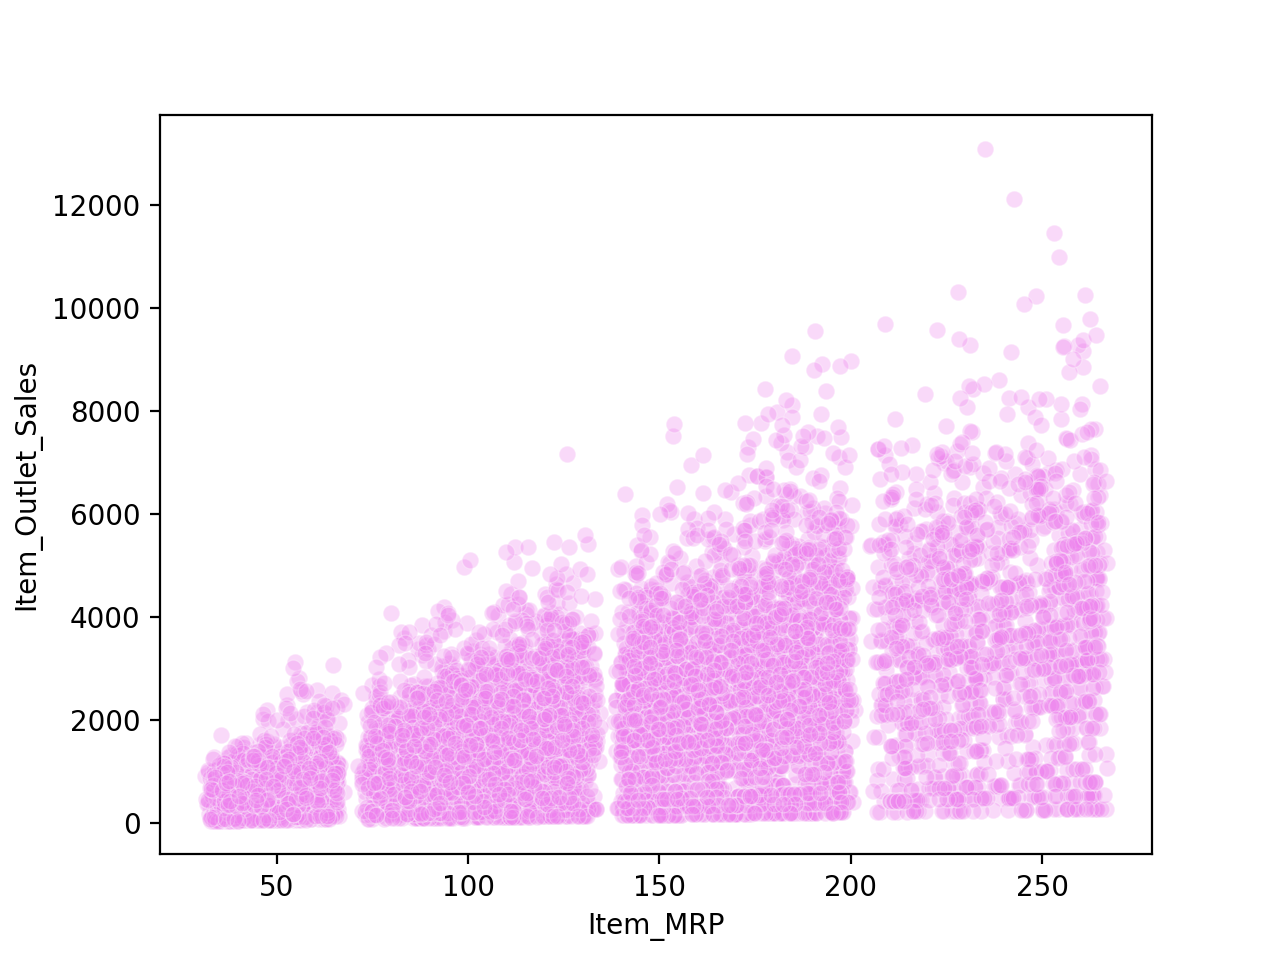

In [23]:
#Item_MRP VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_MRP", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

#### Observations :

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

In Item_Visibility VS Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero.

In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


#### Target Variable VS Independent Categorical Variables

We'll use violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the traget variable values.

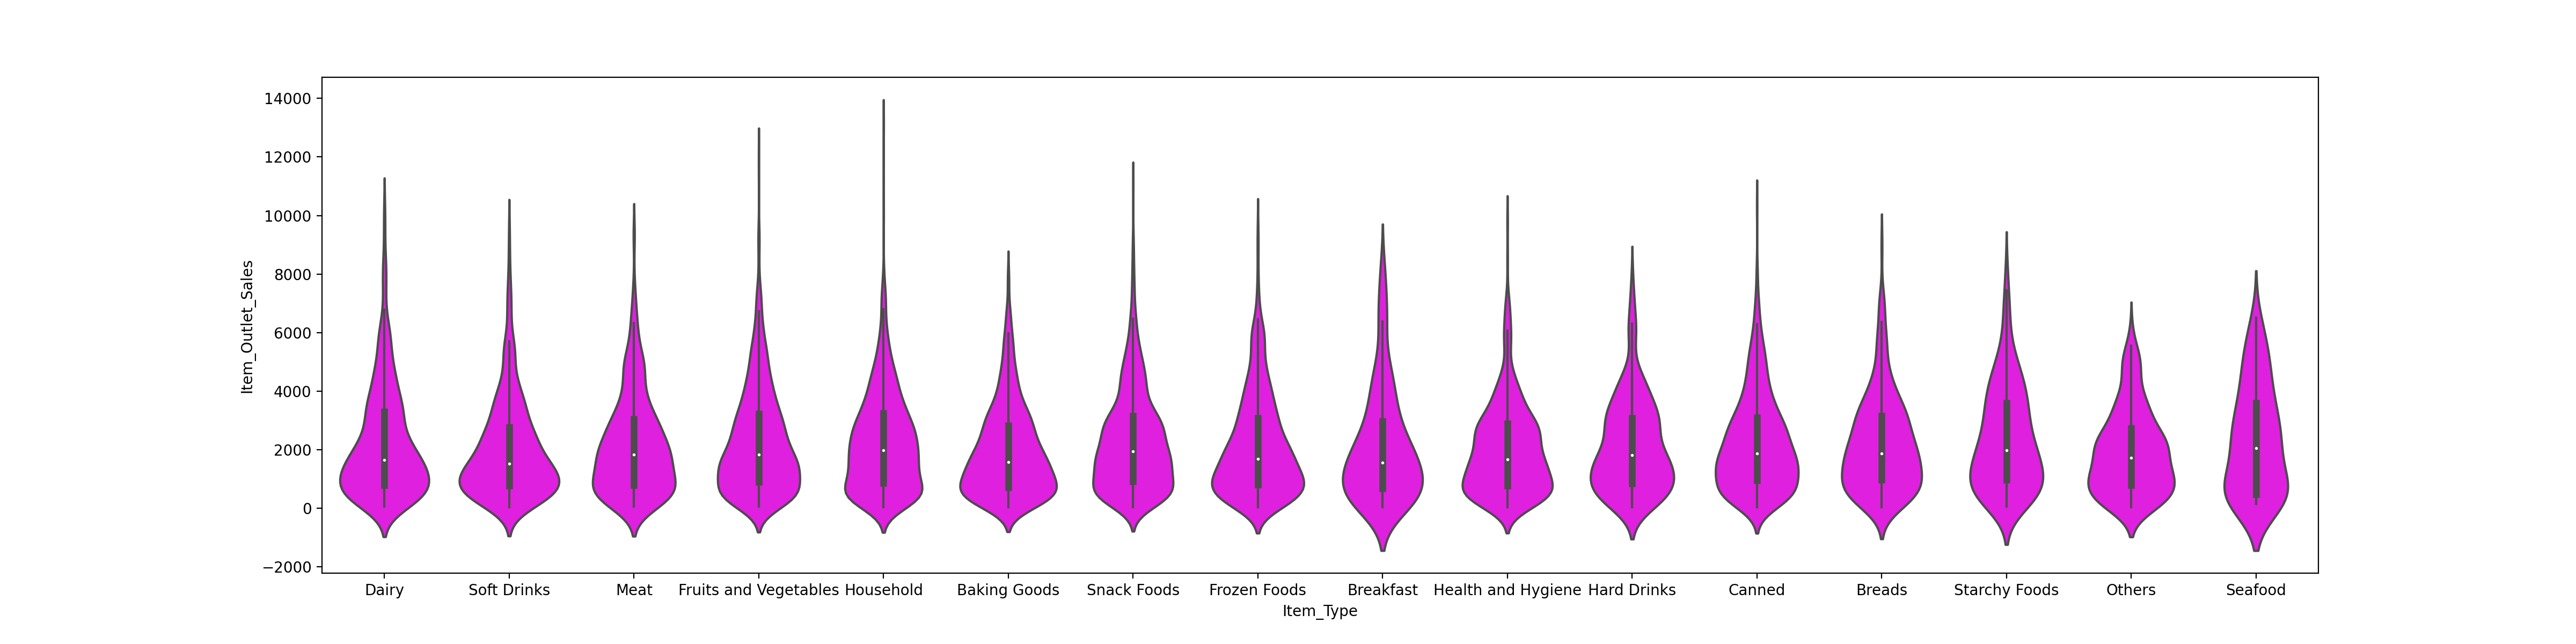

In [24]:
#Item_Type VS Item_Outlet_Sales
plt.figure(figsize=(24,6))
sns.violinplot(data = data_train, x="Item_Type", y = "Item_Outlet_Sales", 
                color = "magenta")
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

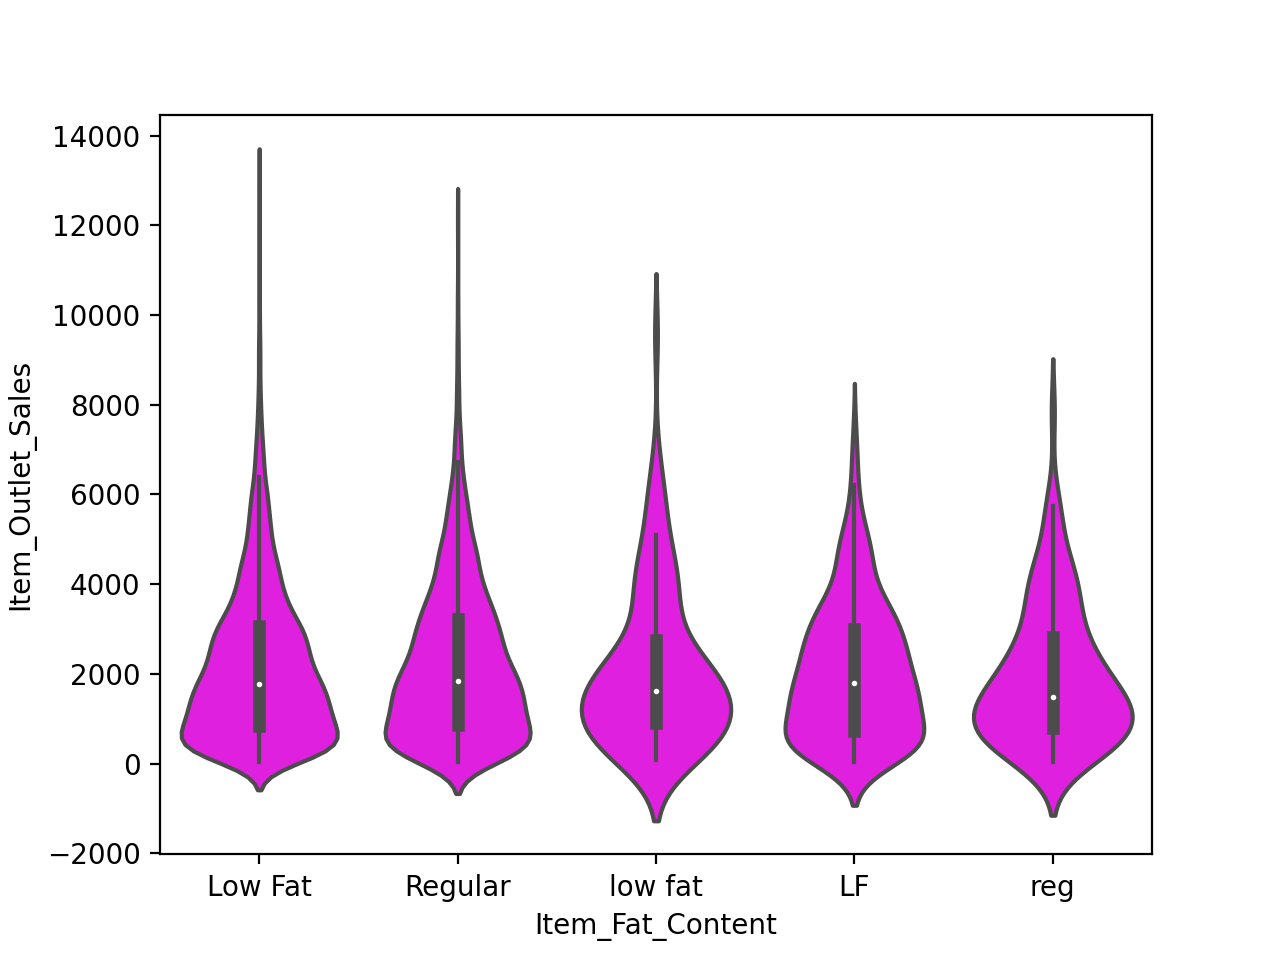

In [25]:
#Item_Fat_Content VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Item_Fat_Content", y = "Item_Outlet_Sales", 
                color = "magenta")

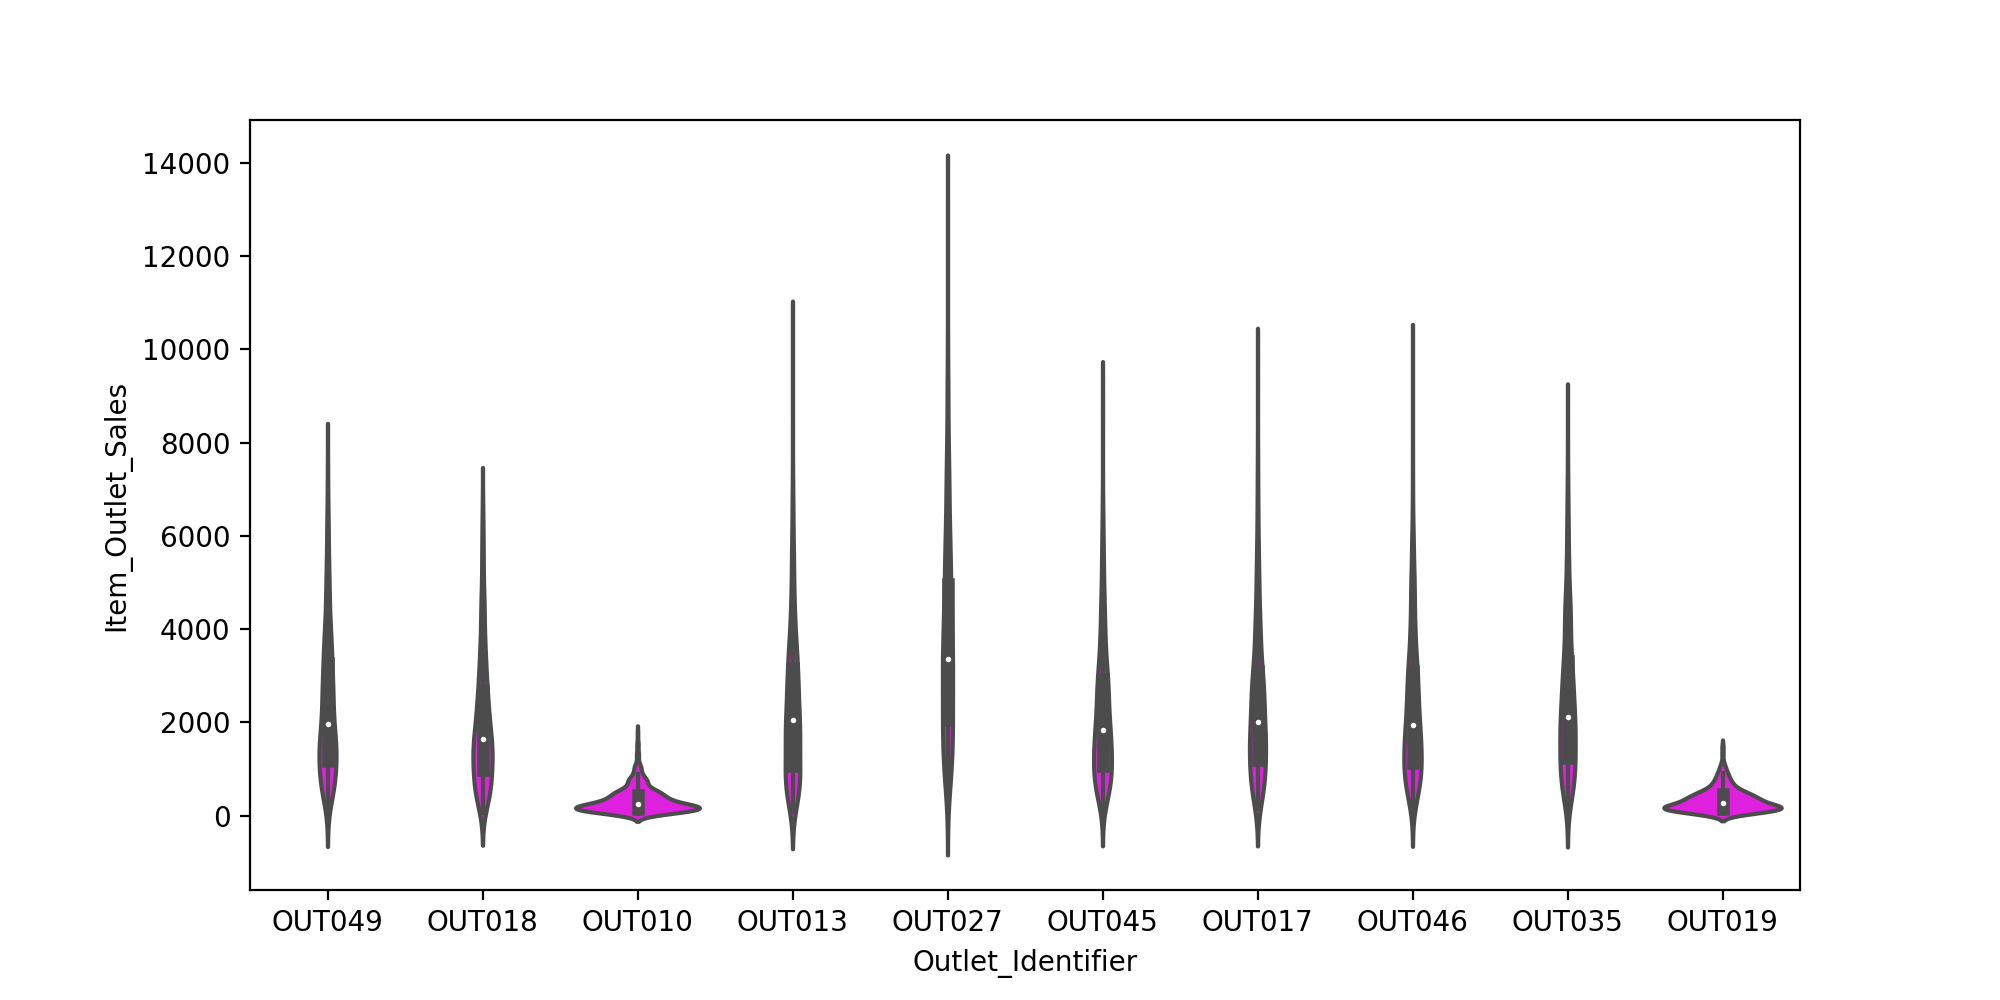

In [26]:
#Outlet_Identifier VS Item_Outlet_Sales
plt.figure(figsize=(10,5))
sns.violinplot(data = data_train, x="Outlet_Identifier", y = "Item_Outlet_Sales", 
                color = "magenta")
plt.show()

#### Observations

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.

The distribution of OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identfier.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

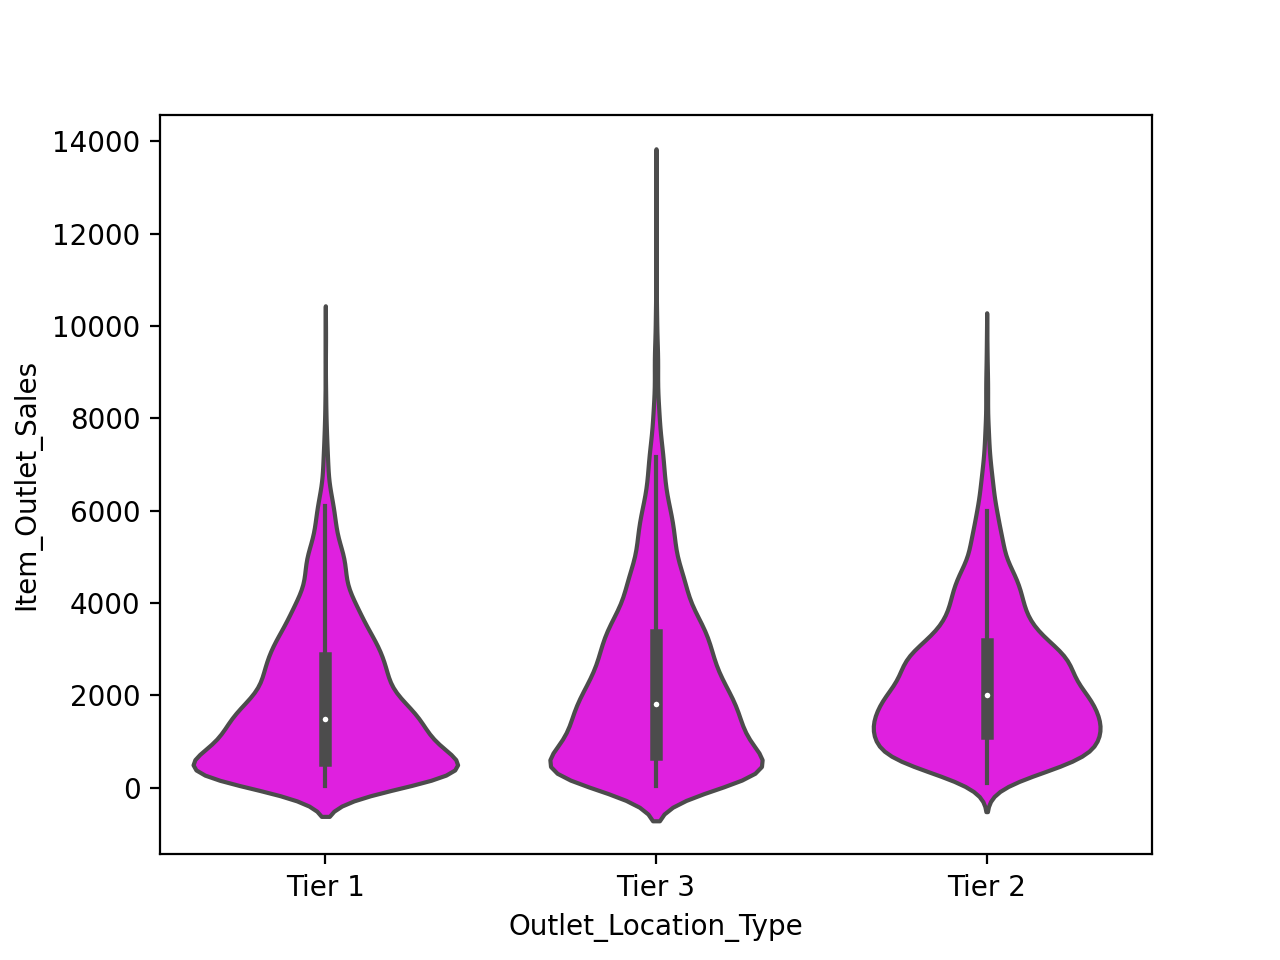

In [27]:
#Outlet_Location_Type VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Outlet_Location_Type", y = "Item_Outlet_Sales", 
                color = "magenta")

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

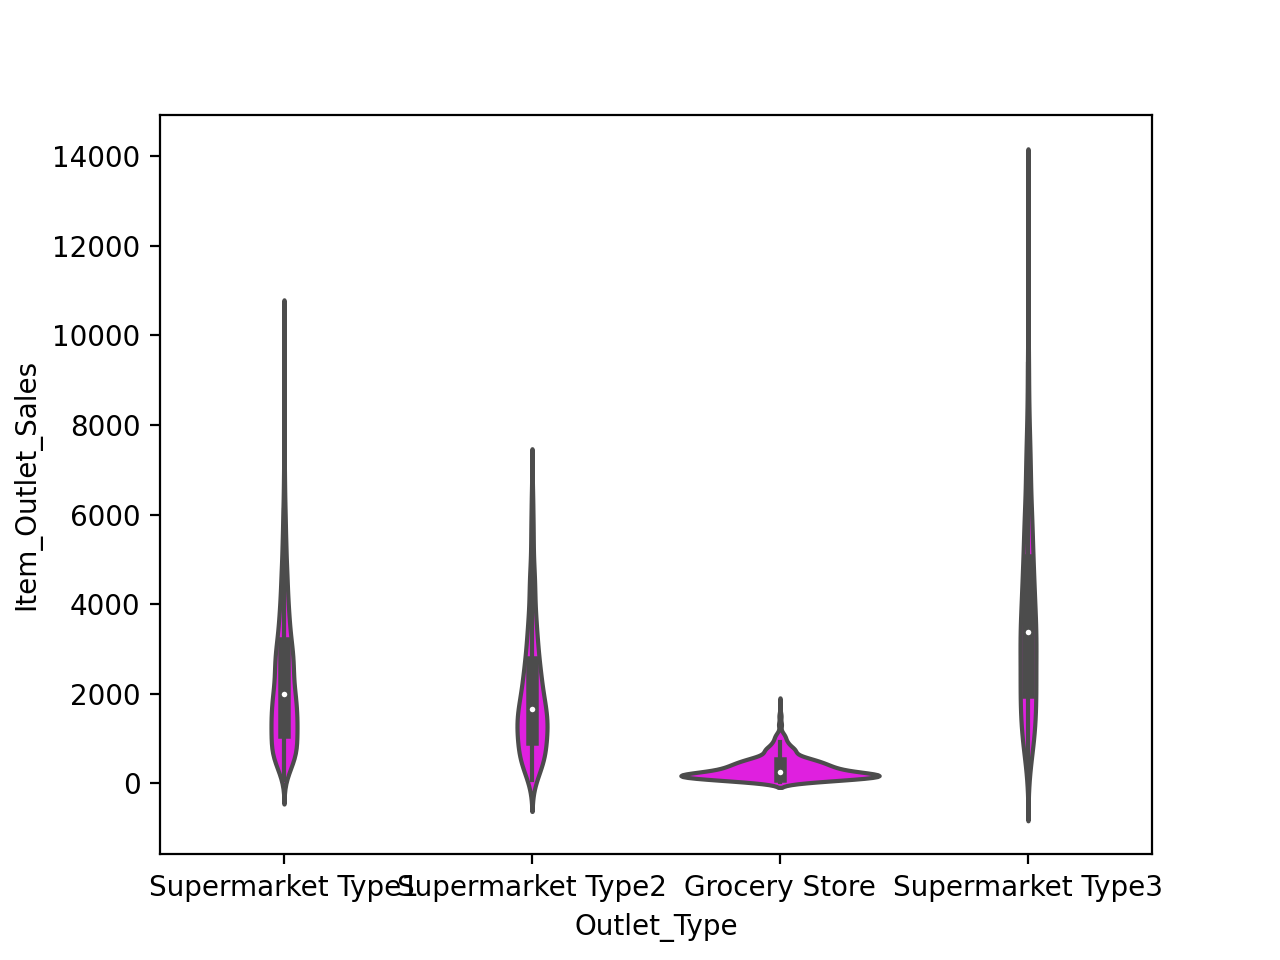

In [28]:
#Outlet_Type VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Outlet_Type", y = "Item_Outlet_Sales", 
                color = "magenta")

#### Observations

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.

In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

## Missing Values

In [29]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

We have missing values in Item_Weight and Outlet_Size

In [30]:
df = data.copy()

In [31]:
#Imputing Item_Weight with mean weight based on the Item_Identifier variable
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

In [32]:
df['Item_Weight'].isnull().sum()

0

In [33]:
#Outlet_Size
df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]), inplace=True)

In [34]:
df['Outlet_Size'].isnull().sum()

0

## Feature Engineering

In [35]:
#Replacing 0's in Item_Visibility variable

zero_index = df[df['Item_Visibility'] == 0].index

for i in zero_index:
    item = df['Item_Identifier'][i]
    mean_visibility = df[data['Item_Identifier'] == item]['Item_Visibility'].mean()
    df.at[i, 'Item_Visibility'] = mean_visibility

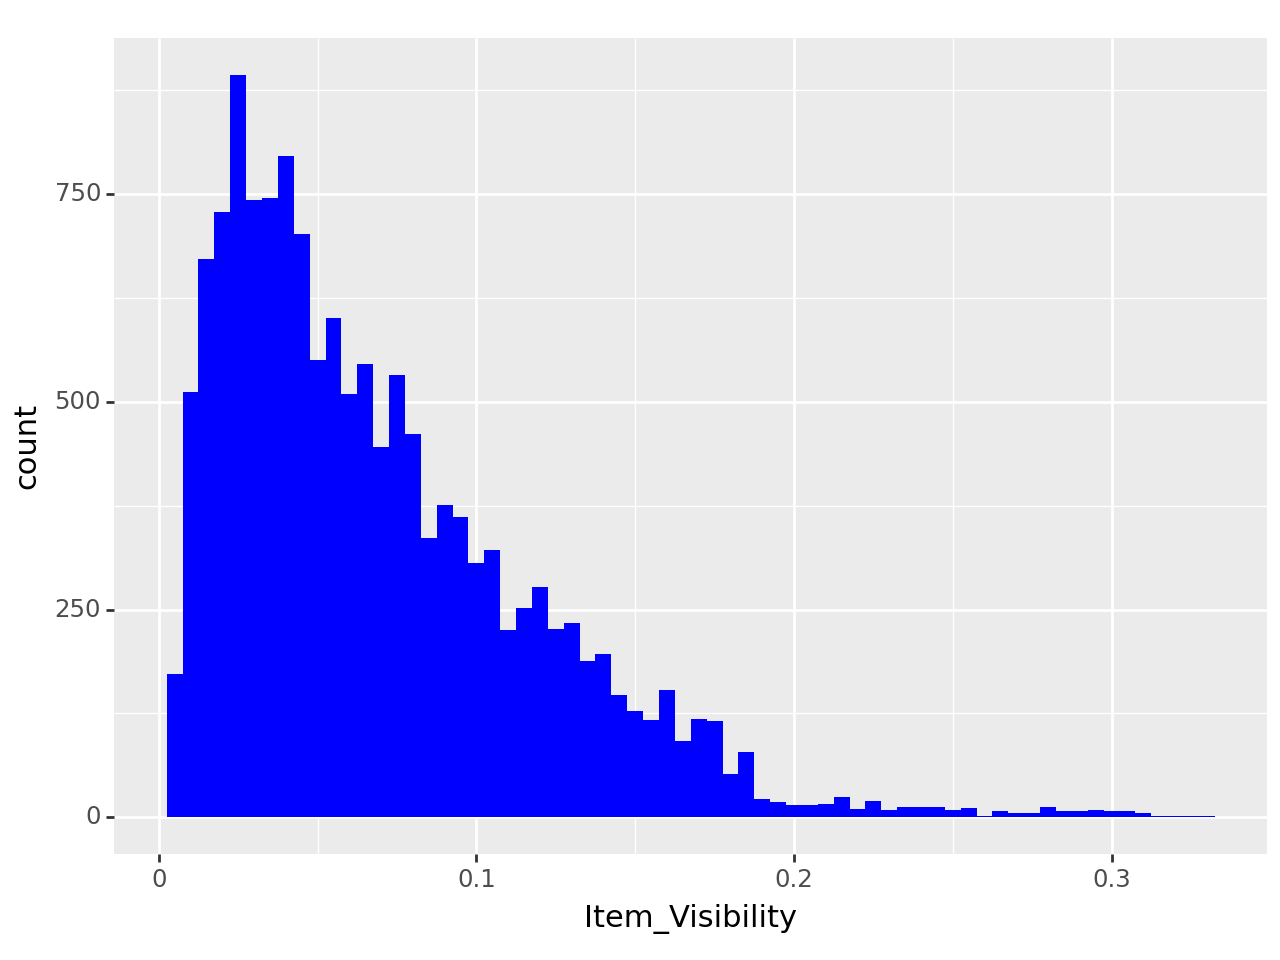

<Figure Size: (640 x 480)>

In [36]:
ggplot(df) + geom_histogram(aes("Item_Visibility"), binwidth = 0.005,
                                    fill = "blue")

In [37]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

We will create the following new features:

Item_Type_new : Broader categories for the variable Item_Type

Item_Category : Categorical variable derived from Item_Identifier

Outlet_Years : Years of operation for outlets

price_per_unit_wt : Item_MRP/Item_Weight

Item_MRP_clusters : Binned feature for Item_MRP

Item_Type variable can be classified into "perishable" and "non_perishable" and make it into a new feature.

In [38]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [39]:
perishable = ["Dairy", "Meat", "Fruits and Vegetables", "Breakfast", "Breads", "Seafood"]

non_perishable = ["Soft Drinks","Household", "Baking Goods", "Frozen Foods", "Health and Hygiene",
                  "Hard Drinks", "Canned"]

In [40]:
df['Item_Type_new'] = df['Item_Type'].apply(lambda x: 'perishable' if x in perishable
                                           else 'non_perishable' if x in non_perishable
                                           else 'not_sure')

In [41]:
df['Item_Type_new'].value_counts()

non_perishable    7090
perishable        4576
not_sure          2538
Name: Item_Type_new, dtype: int64

Comparing Item_Type with the first 2 charaters of Item_Identifier, i.e., 'DR', 'FR' and 'NC'. These identifiers most probably stand for drinks, food and non-consumerable.

In [42]:
table = df.groupby([df['Item_Type'], df['Item_Identifier'].str[:2]]).size().unstack(fill_value=0)
print(table)

Item_Identifier         DR    FD    NC
Item_Type                             
Baking Goods             0  1086     0
Breads                   0   416     0
Breakfast                0   186     0
Canned                   0  1084     0
Dairy                  229   907     0
Frozen Foods             0  1426     0
Fruits and Vegetables    0  2013     0
Hard Drinks            362     0     0
Health and Hygiene       0     0   858
Household                0     0  1548
Meat                     0   736     0
Others                   0     0   280
Seafood                  0    89     0
Snack Foods              0  1989     0
Soft Drinks            726     0     0
Starchy Foods            0   269     0


Based on this we can create a new feature "Item_category"

In [43]:
df['Item_category'] = df['Item_Identifier'].apply(lambda x: x[:2])

We will change the values of Item_Fat_Content wherever Item_Category is 'NC' because non-consumerable items cannot have any fat content.

In [44]:
df.loc[df['Item_category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [45]:
#Outlet_Years (years of operation)
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')


In [46]:
#price_per_unit_wt (price per unit length)
df['price_per_unit_wt'] = df['Item_MRP'] / df['Item_Weight']

Earlier in the Item_MRP VS Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks.
We will assign a label to each of these chunks and use this label as a new variable

In [47]:
#Item_MRP_clusters
conditions = [
    (df['Item_MRP'] < 69),
    (df['Item_MRP'] >= 69) & (df['Item_MRP'] < 136),
    (df['Item_MRP'] >= 136) & (df['Item_MRP'] < 203),
]
values = ['1st', '2nd', '3rd']

df['Item_MRP_clusters'] = np.select(conditions, values, default='4th')

In [48]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93       Non-Edible         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                      1999      Medium               Tier 1   
1                      2009      Medium               Tier 3   
2                      1999      Medium               Tier 1   
3                      1998       Small               Tier 3   
4                      1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   Item_Type_new Item_category  \
0  Supermarket Type1          3735.1380      perishable            FD   
1  Supermarket Type2           443.4228  non_perishable            DR   
2  Supermarket Type1          2097.2700      perishable            FD   
3      Grocery Store           732.3800      perishable            FD   
4  Supermarket Type1           994.7052  non_perishable            NC   

   Outlet_Years  price_per_unit_wt Item_MRP_clusters  
0            14          26.861204               4th  
1             4           8.153581               1st  
2            14           8.092457               3rd  
3            15           9.484115               3rd  
4            26           6.031512               1st

In [49]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year    category
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Item_Type_new                  object
Item_category                  object
Outlet_Years                    int64
price_per_unit_wt             float64
Item_MRP_clusters              object
dtype: object

## Encoding Categorical Variables

##### Label Encoding for Outlet_Size and Outlet_Location_Type

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

In [52]:
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

##### One Hot Encoding

In [53]:
columns_to_drop = ["Item_Identifier", "Outlet_Establishment_Year", "Item_Type"]
df = df.drop(columns=columns_to_drop, axis=0)

# Perform one-hot encoding
df_enc = pd.get_dummies(df, drop_first=True)

In [54]:
df_enc.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Size                        int32
Outlet_Location_Type               int32
Item_Outlet_Sales                float64
Outlet_Years                       int64
price_per_unit_wt                float64
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_new_not_sure             uint8
Item_Type_new_perishable           uint8
Item_category_FD

## Data Preprocessing

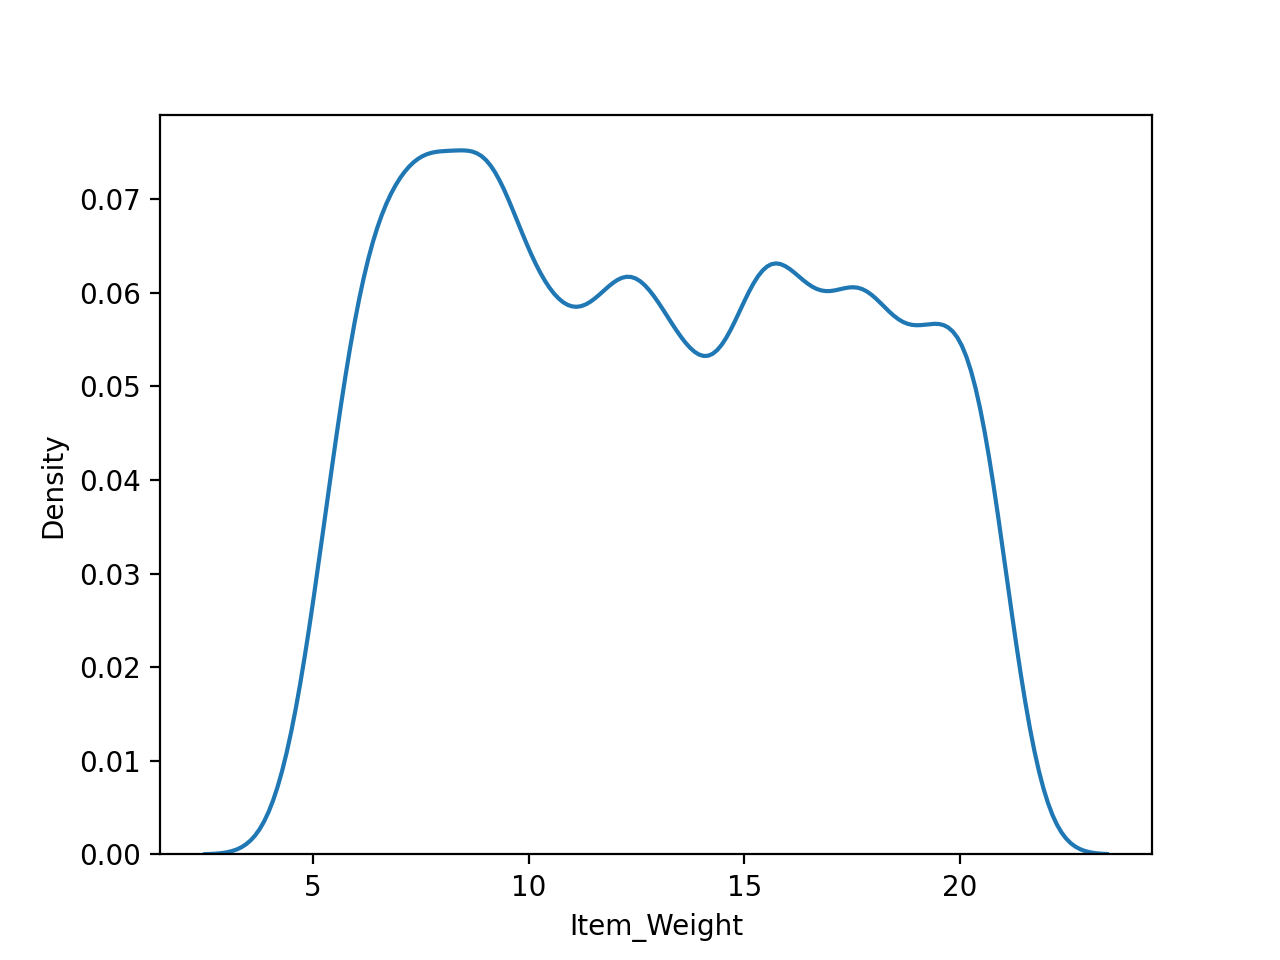

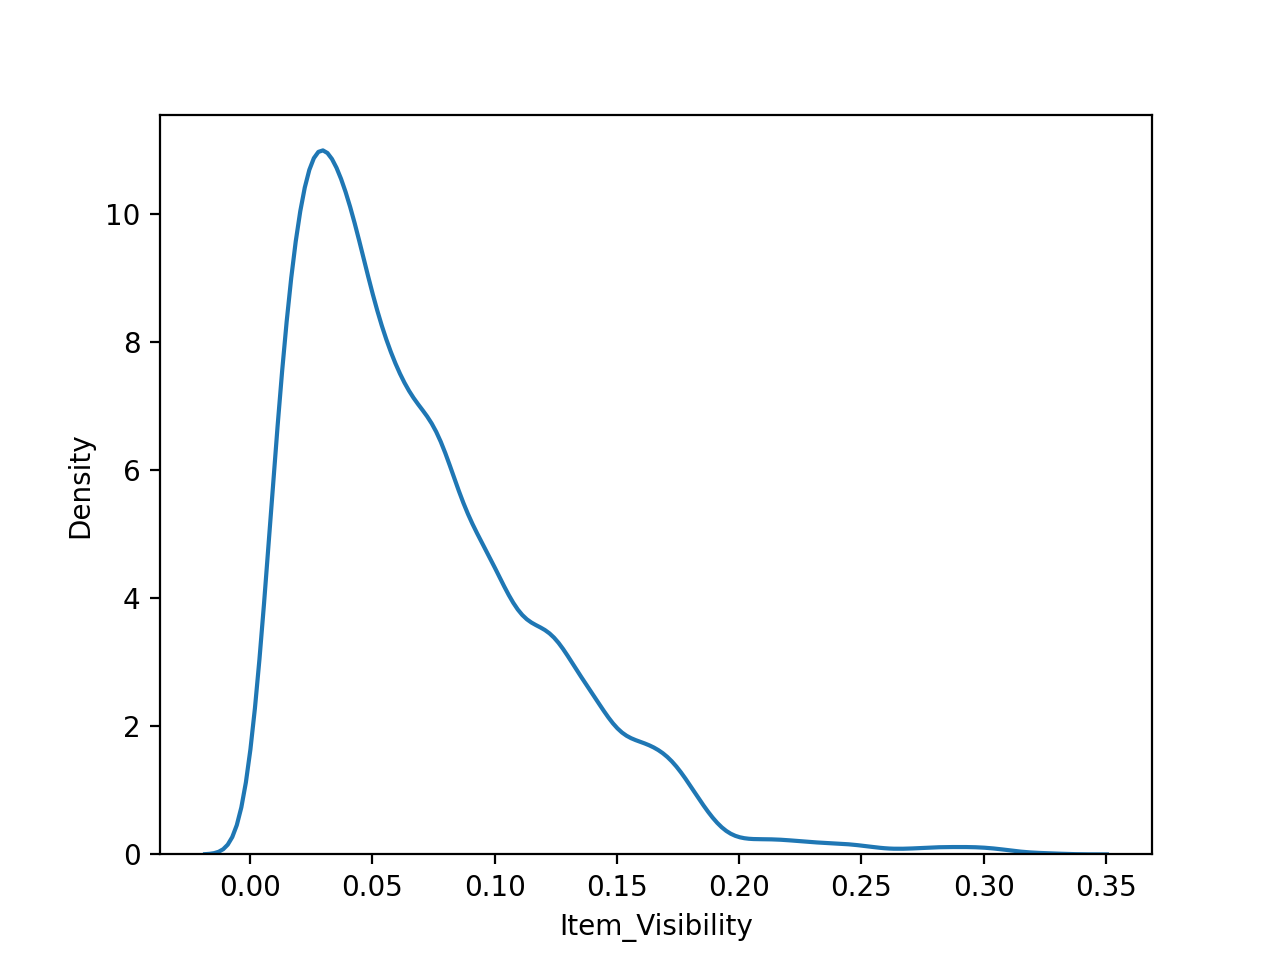

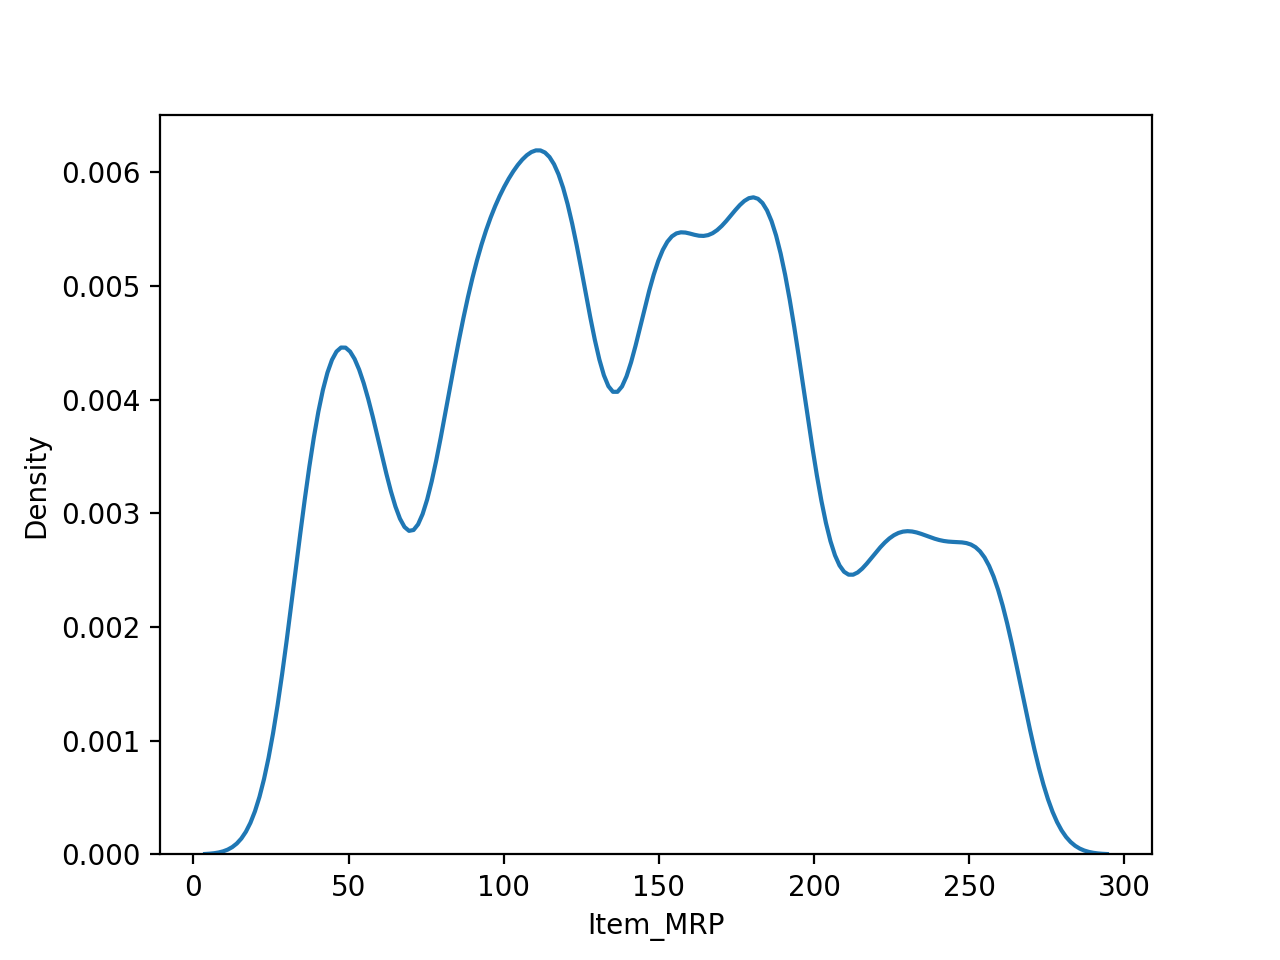

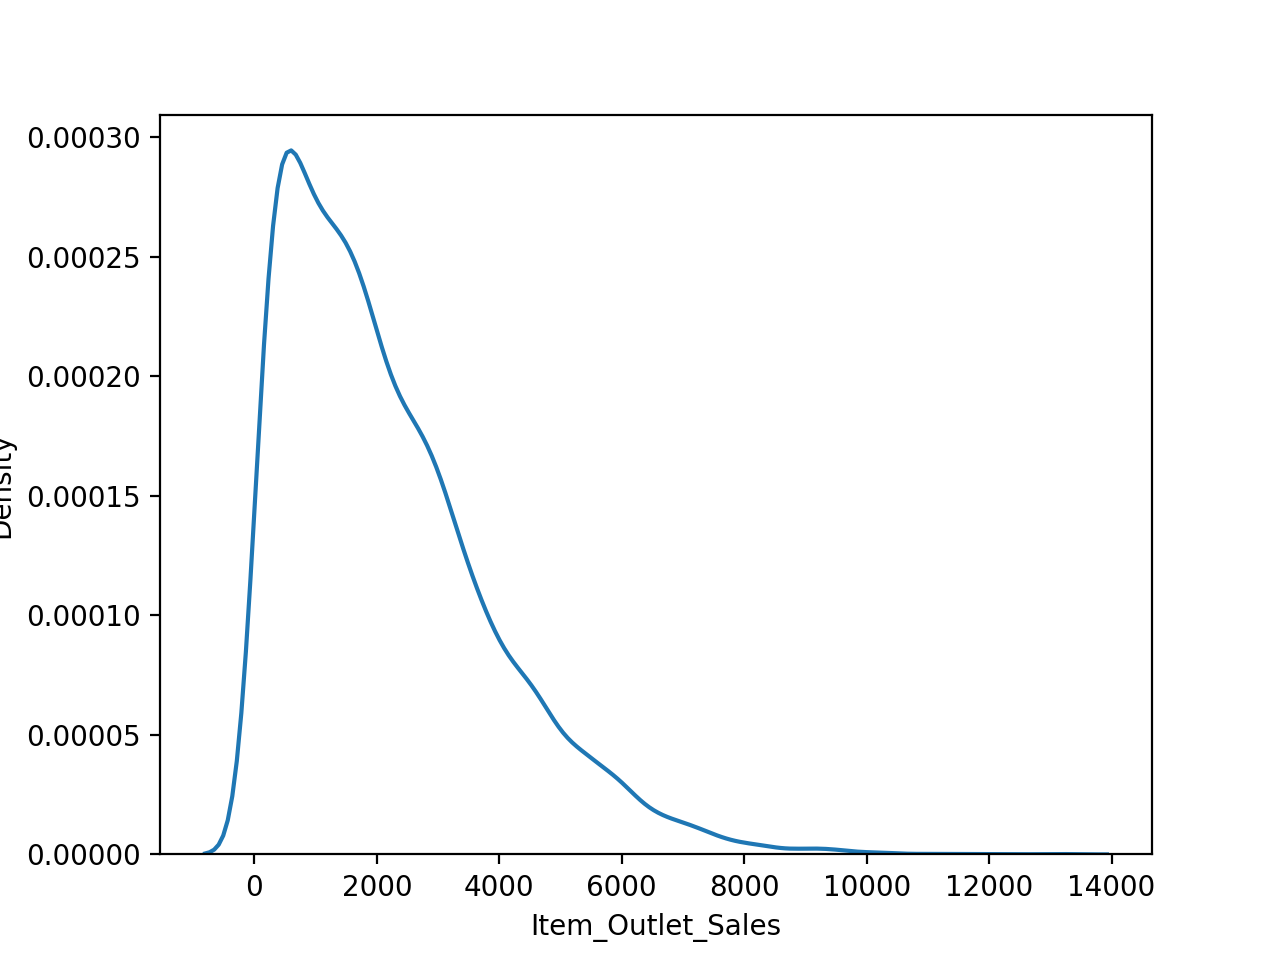

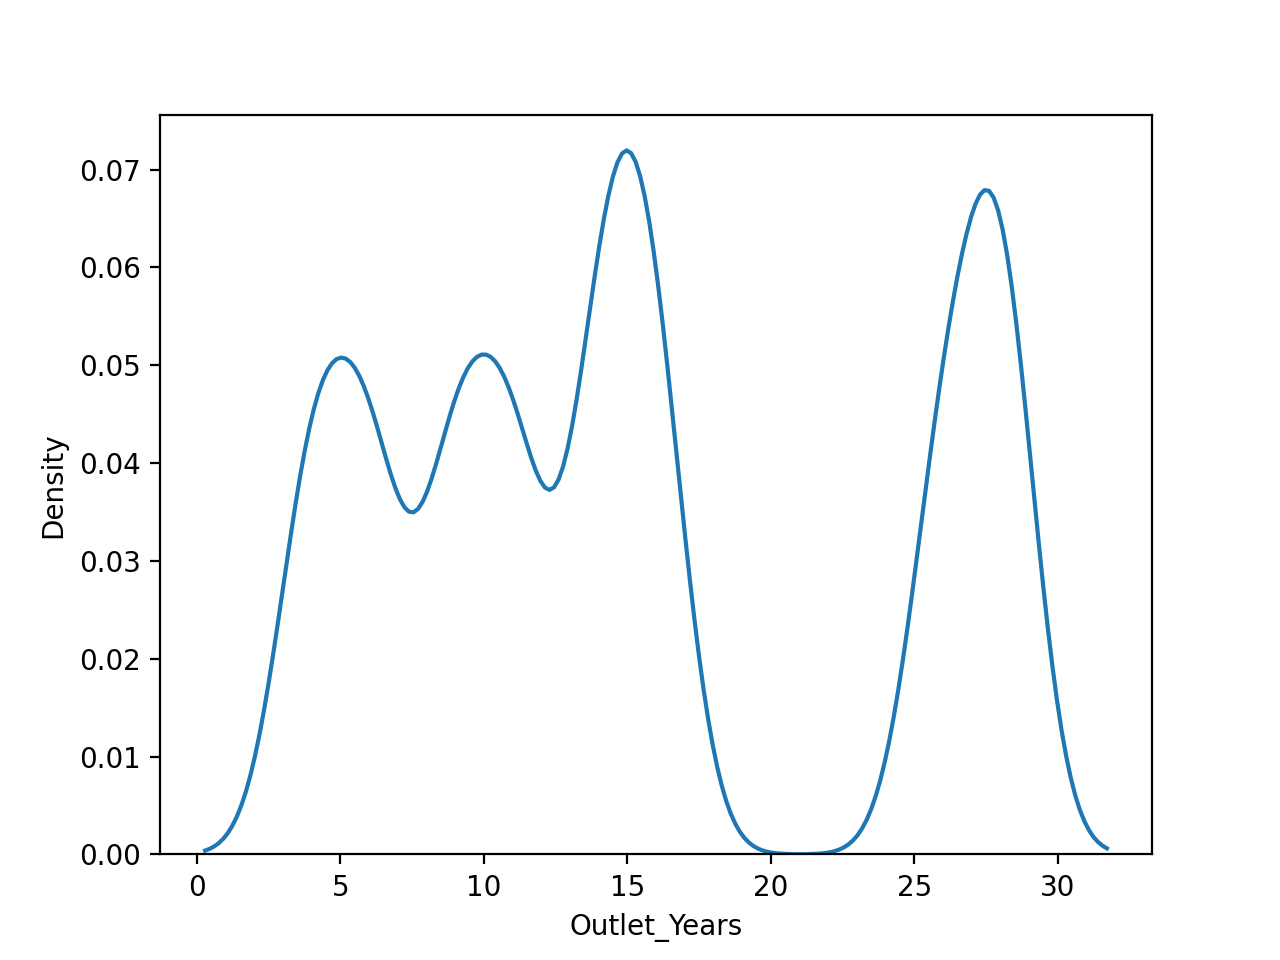

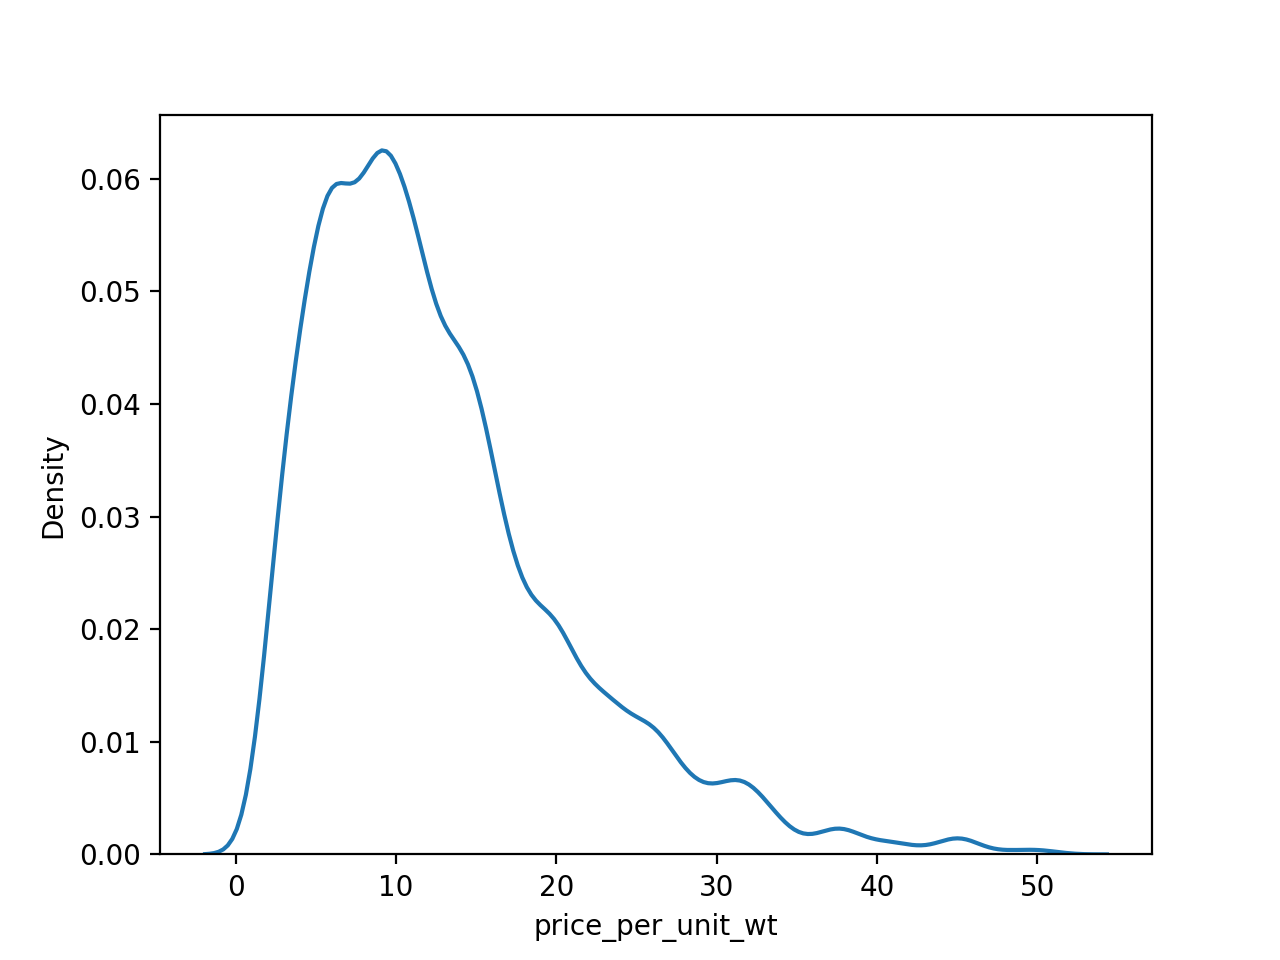

In [55]:
for i in df_enc.columns:
    if df_enc[i].dtypes=='float64':
        sns.kdeplot(df_enc[i])
        plt.xlabel(i)
        plt.show()
    elif df_enc[i].dtypes=='int64':
        sns.kdeplot(df_enc[i])
        plt.xlabel(i)
        plt.show()

Removing Skewness

In [56]:
df_scaled = df_enc.copy()
df_scaled['Item_Visibility'] = np.log(df_enc['Item_Visibility'] + 1)
df_scaled['price_per_unit_wt'] = np.log(df_enc['price_per_unit_wt'] + 1)

#added 1 to avoid errors when taking the logarithm of zero or negative values

In [57]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named df_scaled
num_vars = df_scaled.select_dtypes(include=['number']).columns
num_vars_names = list(num_vars)
df_numeric = df_scaled[num_vars_names].drop("Item_Outlet_Sales", axis=1)

# Standardize (center and scale) the numeric features
scaler = StandardScaler()
df_numeric_norm = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Remove the unscaled numeric columns
df_scaled = df_scaled.drop(columns=num_vars_names)

# Concatenate the scaled numeric columns back to the DataFrame
df_scaled = pd.concat([df_scaled, df_numeric_norm], axis=1)
df_scaled['Item_Outlet_Sales'] = df['Item_Outlet_Sales']

#### Correlated Variables

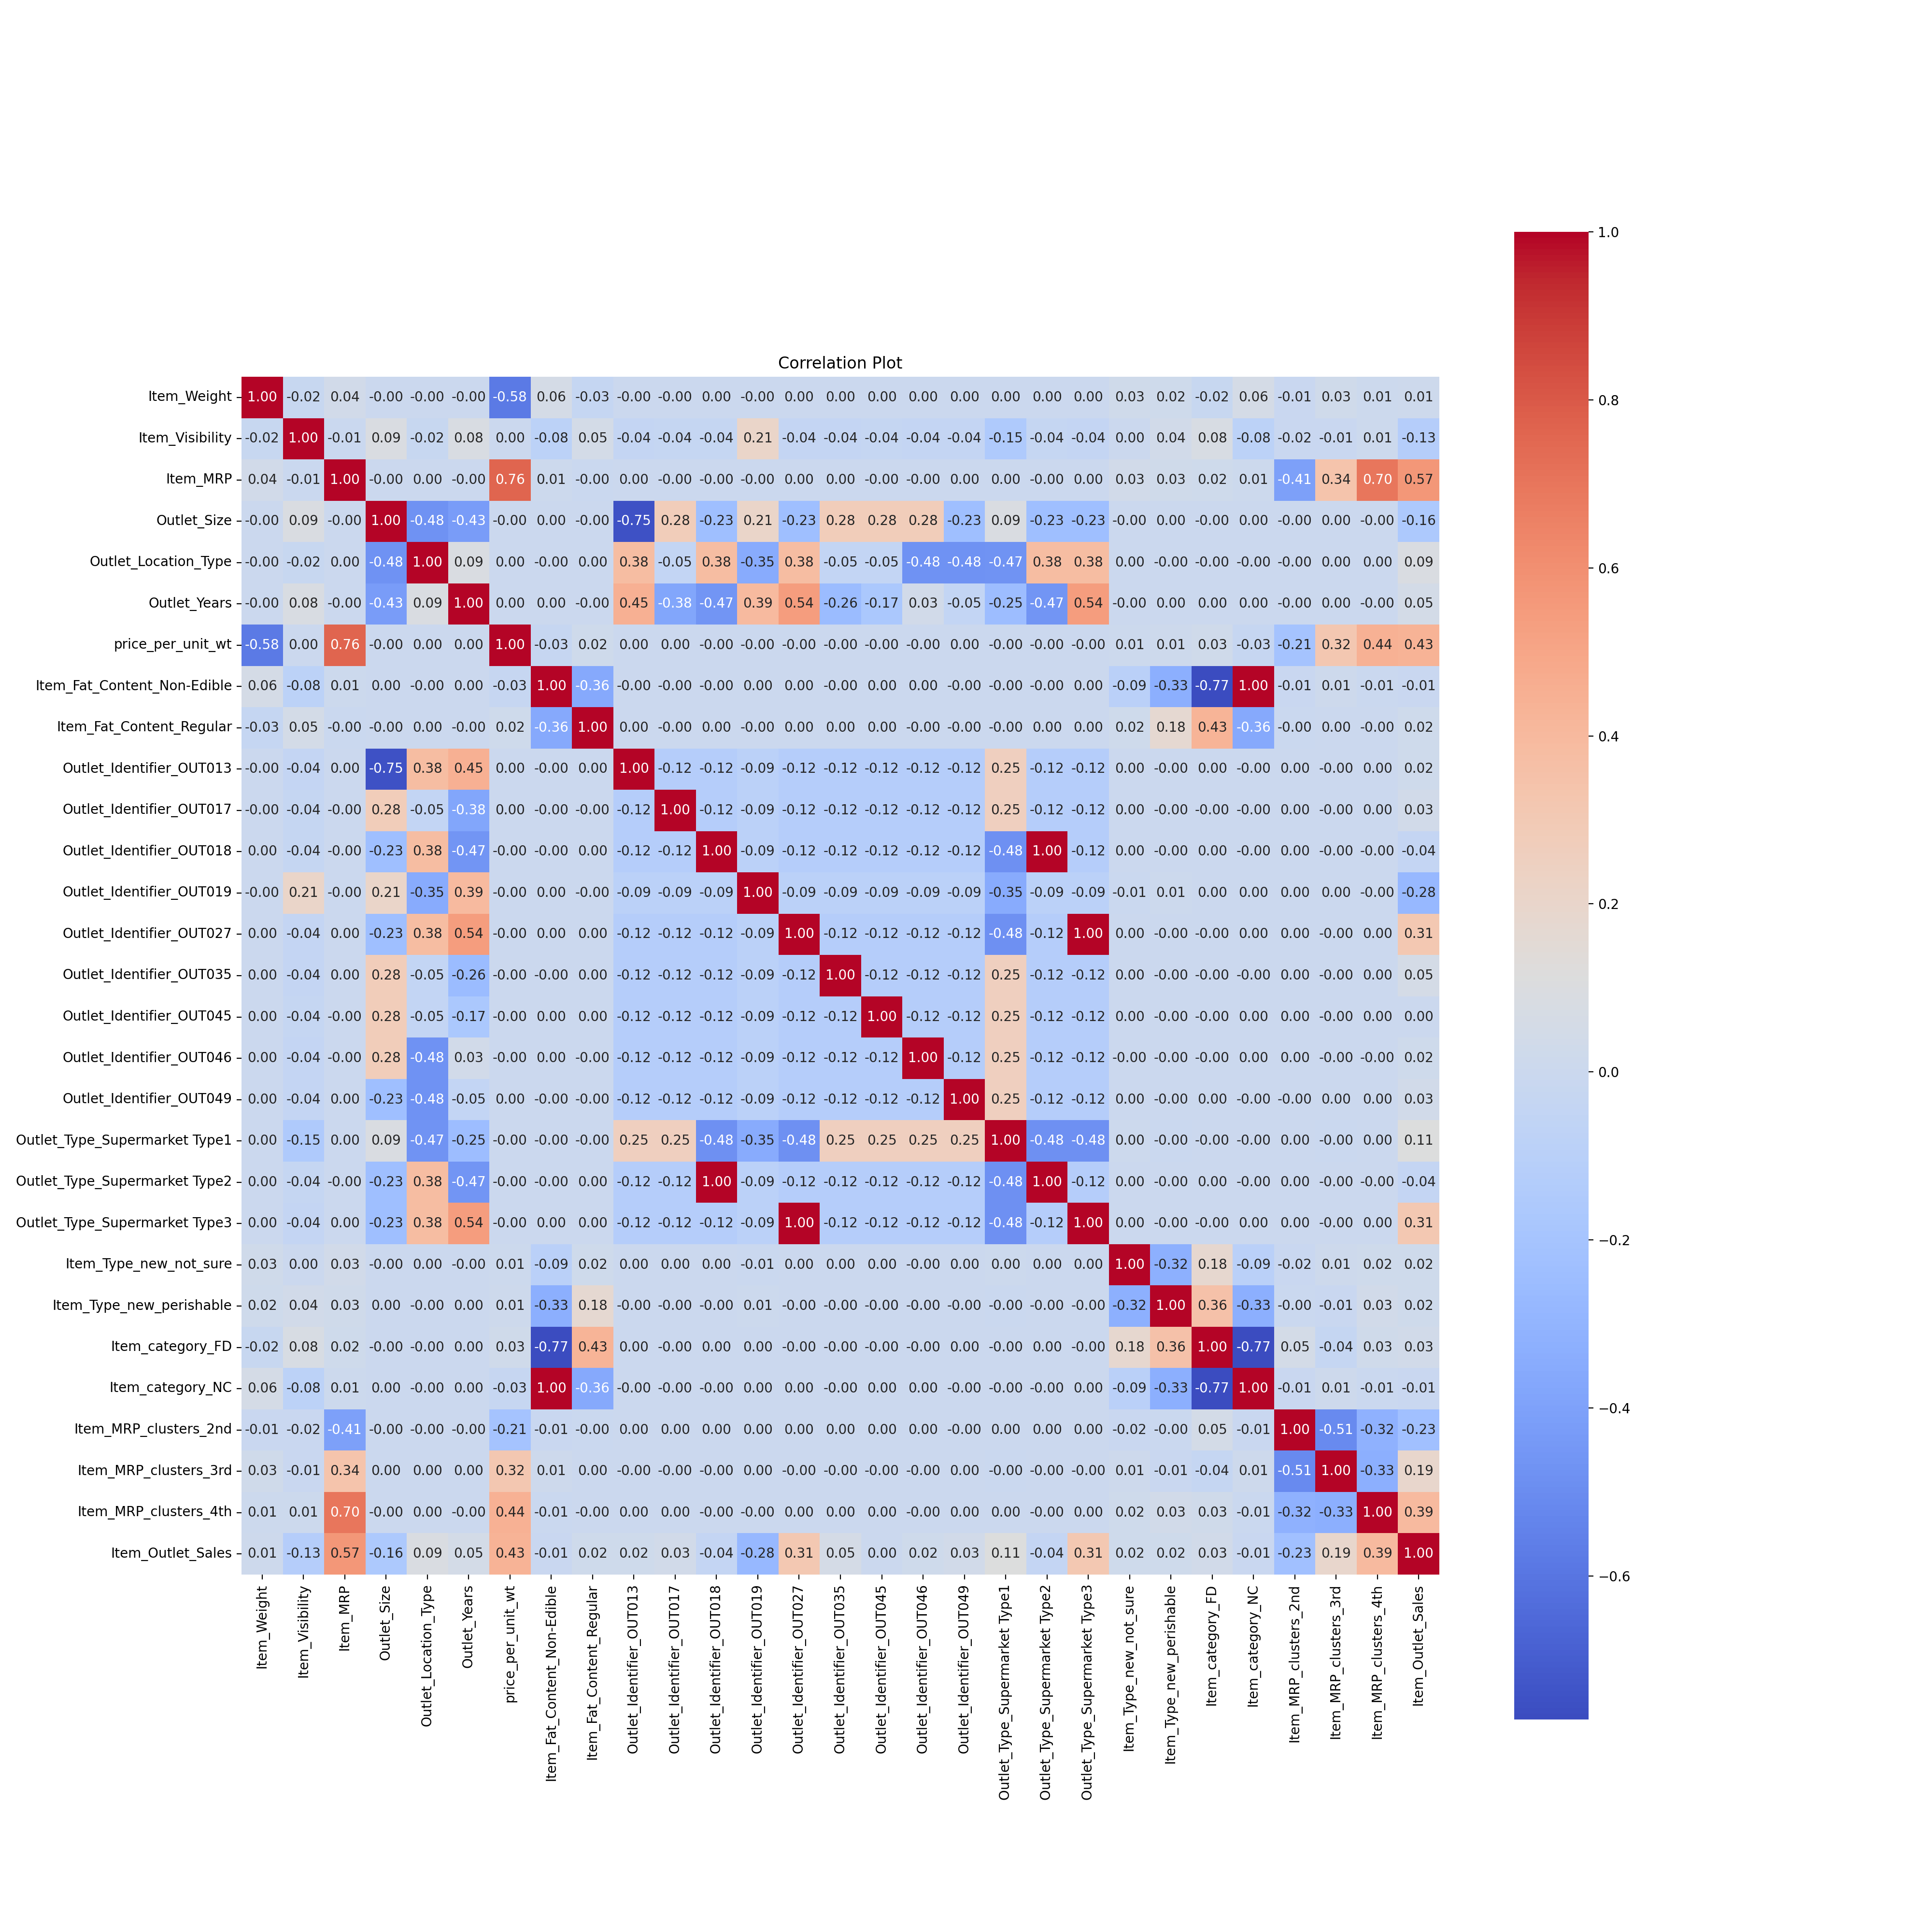

In [58]:
# Calculate the correlation matrix
cor_df = df_scaled.corr(numeric_only = True)

# Create a correlation plot
plt.figure(figsize=(20, 20))
sns.heatmap(cor_df, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Plot")
plt.show()

We observe highly correlated variables like price_per_unit_wt and Item_Weight, price_per_unit_wt and Item_MRP etc. as the former one was created from the latter.

#### Splitting the combined data back to train and test set.

In [118]:
n_train = len(data_train)  

# Splitting into training and test sets
train = df_scaled[:n_train]
test = df_scaled[n_train:]

# Remove 'Item_Outlet_Sales' from the test set since it has only na values
test = test.drop(columns=['Item_Outlet_Sales'])

In [119]:
train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  Outlet_Location_Type  \
0    -0.751014        -1.114435  1.752511    -0.664115             -1.369286   
1    -1.477653        -1.044385 -1.493696    -0.664115              1.091566   
2     1.011839        -1.098962  0.009874    -0.664115             -1.369286   
3     1.377308        -1.075663  0.661838     0.799968              1.091566   
4    -0.830557        -1.250959 -1.403623    -2.128198              1.091566   

   Outlet_Years  price_per_unit_wt  Item_Fat_Content_Non-Edible  \
0     -0.139681           1.495084                    -0.482908   
1     -1.334228          -0.429946                    -0.482908   
2     -0.139681          -0.441533                    -0.482908   
3     -0.020226          -0.195232                    -0.482908   
4      1.293777          -0.886076                     2.070787   

   Item_Fat_Content_Regular  Outlet_Identifier_OUT013  ...  \
0                 -0.739212                 -0.350367  ...   
1                  1.352792                 -0.350367  ...   
2                 -0.739212                 -0.350367  ...   
3                  1.352792                 -0.350367  ...   
4                 -0.739212                  2.854149  ...   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                      -0.349480                      -0.351127   
1                       2.861395                      -0.351127   
2                      -0.349480                      -0.351127   
3                      -0.349480                      -0.351127   
4                      -0.349480                      -0.351127   

   Item_Type_new_not_sure  Item_Type_new_perishable  Item_category_FD  \
0               -0.466428                  1.450524          0.626428   
1               -0.466428                 -0.689406         -1.596352   
2               -0.466428                  1.450524          0.626428   
3               -0.466428                  1.450524          0.626428   
4               -0.466428                 -0.689406         -1.596352   

   Item_category_NC  Item_MRP_clusters_2nd  Item_MRP_clusters_3rd  \
0         -0.482908              -0.698871              -0.729671   
1         -0.482908              -0.698871              -0.729671   
2         -0.482908              -0.698871               1.370481   
3         -0.482908              -0.698871               1.370481   
4          2.070787              -0.698871              -0.729671   

   Item_MRP_clusters_4th  Item_Outlet_Sales  
0               2.217732          3735.1380  
1              -0.450911           443.4228  
2              -0.450911          2097.2700  
3              -0.450911           732.3800  
4              -0.450911           994.7052  

[5 rows x 29 columns]

In [120]:
test.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  \
8523     1.710530        -1.299410 -0.533831    -0.664115   
8524    -0.965996        -0.633707 -0.864708     0.799968   
8525     0.388391         0.628711  1.622763     0.799968   
8526    -1.177753        -1.128748  0.225966     0.799968   
8527     0.173409         1.007191  1.501577    -0.664115   

      Outlet_Location_Type  Outlet_Years  price_per_unit_wt  \
8523             -1.369286     -0.139681          -1.104239   
8524             -0.138860     -1.095319          -0.032209   
8525              1.091566     -0.020226           0.696601   
8526             -0.138860     -1.095319           1.101783   
8527              1.091566      1.532686           0.760826   

      Item_Fat_Content_Non-Edible  Item_Fat_Content_Regular  \
8523                    -0.482908                 -0.739212   
8524                    -0.482908                  1.352792   
8525                     2.070787                 -0.739212   
8526                    -0.482908                 -0.739212   
8527                    -0.482908                  1.352792   

      Outlet_Identifier_OUT013  ...  Outlet_Type_Supermarket Type1  \
8523                 -0.350367  ...                       0.726841   
8524                 -0.350367  ...                       0.726841   
8525                 -0.350367  ...                      -1.375817   
8526                 -0.350367  ...                       0.726841   
8527                 -0.350367  ...                      -1.375817   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
8523                       -0.34948                      -0.351127   
8524                       -0.34948                      -0.351127   
8525                       -0.34948                      -0.351127   
8526                       -0.34948                      -0.351127   
8527                       -0.34948                       2.847976   

      Item_Type_new_not_sure  Item_Type_new_perishable  Item_category_FD  \
8523                2.143953                 -0.689406          0.626428   
8524               -0.466428                  1.450524          0.626428   
8525                2.143953                 -0.689406         -1.596352   
8526                2.143953                 -0.689406          0.626428   
8527               -0.466428                  1.450524          0.626428   

      Item_category_NC  Item_MRP_clusters_2nd  Item_MRP_clusters_3rd  \
8523         -0.482908               1.430879              -0.729671   
8524         -0.482908               1.430879              -0.729671   
8525          2.070787              -0.698871              -0.729671   
8526         -0.482908              -0.698871               1.370481   
8527         -0.482908              -0.698871              -0.729671   

      Item_MRP_clusters_4th  
8523              -0.450911  
8524              -0.450911  
8525               2.217732  
8526              -0.450911  
8527               2.217732  

[5 rows x 28 columns]

## Model Building

### Dependent and Independent Variable

In [88]:
X = train.drop("Item_Outlet_Sales", axis=1)
y = train["Item_Outlet_Sales"]


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64
(8523, 28)


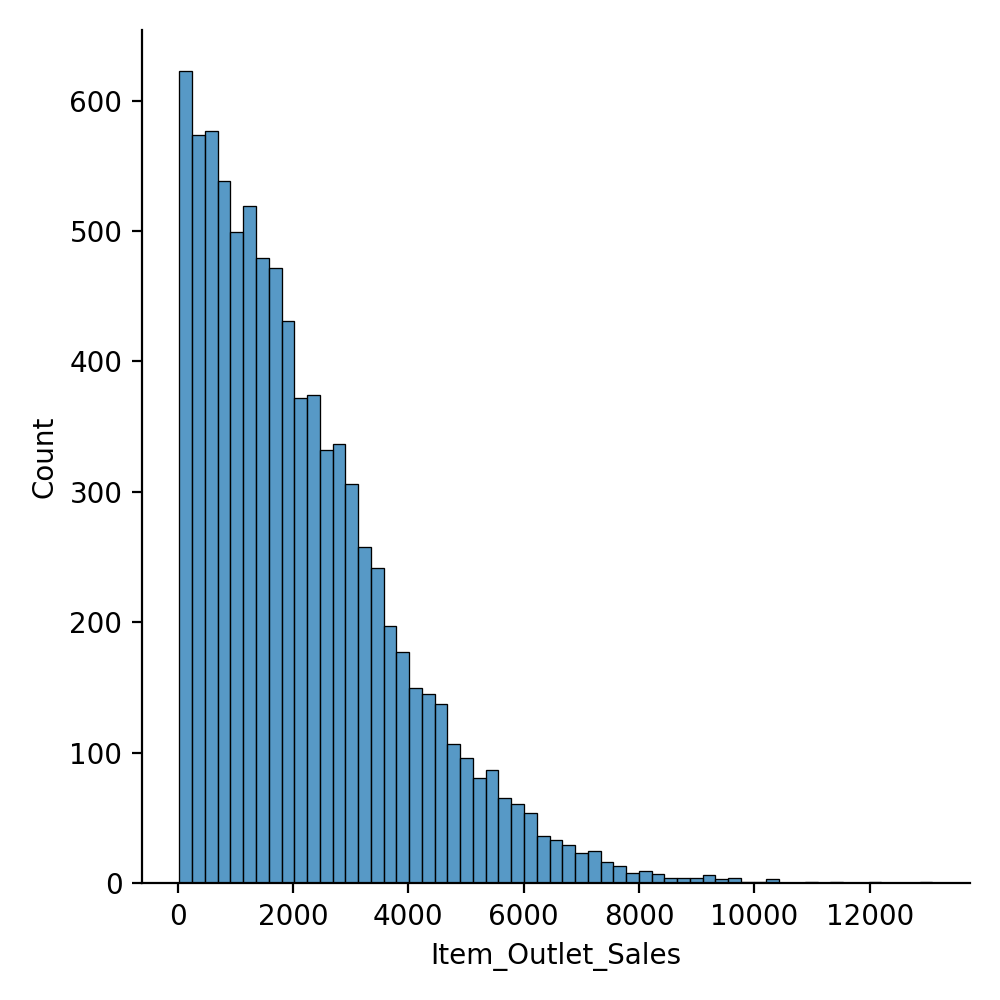

In [89]:
#log Transformation of target Variable
print(y)
print(X.shape)
sns.displot(y)

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64
(8523, 28)


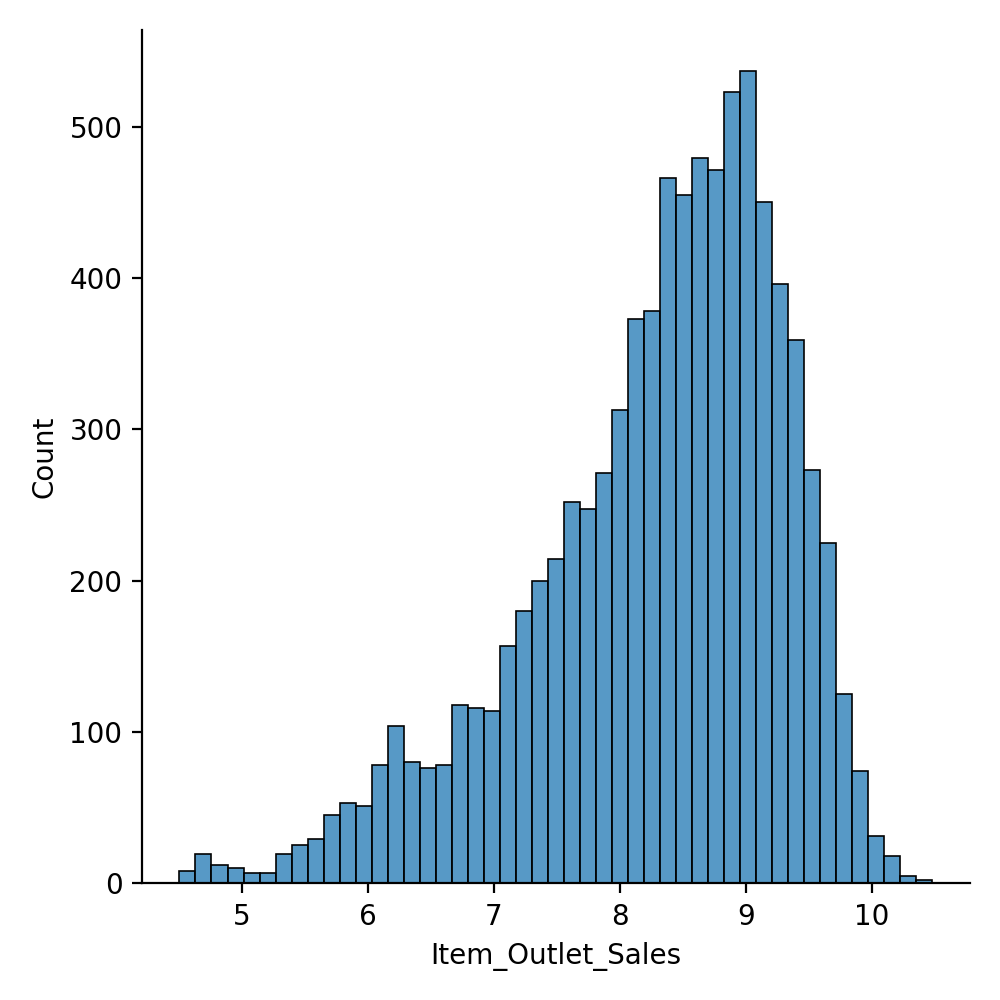

In [90]:
y = np.log(y)
print(y)
print(X.shape)
sns.displot(y+1)

In [91]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1140.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:09:36   Log-Likelihood:                -6530.6
No. Observations:                8523   AIC:                         1.311e+04
Df Residuals:                    8501   BIC:                         1.326e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.2972      0.006   1291.911      0.000       7.286       7.308
Item_Weight                       0.1272      0.024      5.297      0.000       0.080       0.174
Item_Visibility                   0.0023      0.006      0.394      0.694      -0.009       0.014
Item_MRP                          0.3097      0.036      8.644      0.000       0.239       0.380
Outlet_Size                      -0.2891      0.004    -75.428      0.000      -0.297      -0.282
Outlet_Location_Type             -0.2373      0.005    -50.045      0.000      -0.247      -0.228
Outlet_Years                     -0.0683      0.002    -30.580      0.000      -0.073      -0.064
price_per_unit_wt                 0.2128      0.038      5.570      0.000       0.138       0.288
Item_Fat_Content_Non-Edible       0.0009      0.004      0.206      0.837      -0.008       0.010
Item_Fat_Content_Regular          0.0070      0.006      1.113      0.266      -0.005       0.019
Outlet_Identifier_OUT013          0.0515      0.003     16.815      0.000       0.045       0.057
Outlet_Identifier_OUT017          0.1919      0.005     37.202      0.000       0.182       0.202
Outlet_Identifier_OUT018          0.1989      0.004     53.936      0.000       0.192       0.206
Outlet_Identifier_OUT019         -0.1089      0.005    -21.165      0.000      -0.119      -0.099
Outlet_Identifier_OUT027          0.3408      0.004     90.082      0.000       0.333       0.348
Outlet_Identifier_OUT035          0.2058      0.005     38.998      0.000       0.195       0.216
Outlet_Identifier_OUT045          0.1821      0.005     34.241      0.000       0.172       0.192
Outlet_Identifier_OUT046          0.1139      0.005     25.159      0.000       0.105       0.123
Outlet_Identifier_OUT049         -0.0101      0.004     -2.305      0.021      -0.019      -0.002
Outlet_Type_Supermarket Type1     0.4817      0.005     89.366      0.000       0.471       0.492
Outlet_Type_Supermarket Type2     0.1989      0.004     53.936      0.000       0.192       0.206
Outlet_Type_Supermarket Type3     0.3408      0.004     90.082      0.000       0.333       0.348
Item_Type_new_not_sure            0.0030      0.006      0.470      0.638      -0.009       0.015
Item_Type_new_perishable          0.0022      0.007      0.329      0.742      -0.011       0.015
Item_category_FD              -5.157e-05      0.010     -0.005      0.996      -0.019       0.019
Item_category_NC                  0.0009      0.004      0.206      0.837      -0.008       0.010
Item_MRP_clusters_2nd             0.1226      0.015      8.124      0.000       0.093       0.152
Item_MRP_clusters_3rd             0.1356      0.024      5.766      0.000       0.089       0.182
Item_MRP_clusters_4th             0.0618     

## Checking OLS assumptions after log transformation

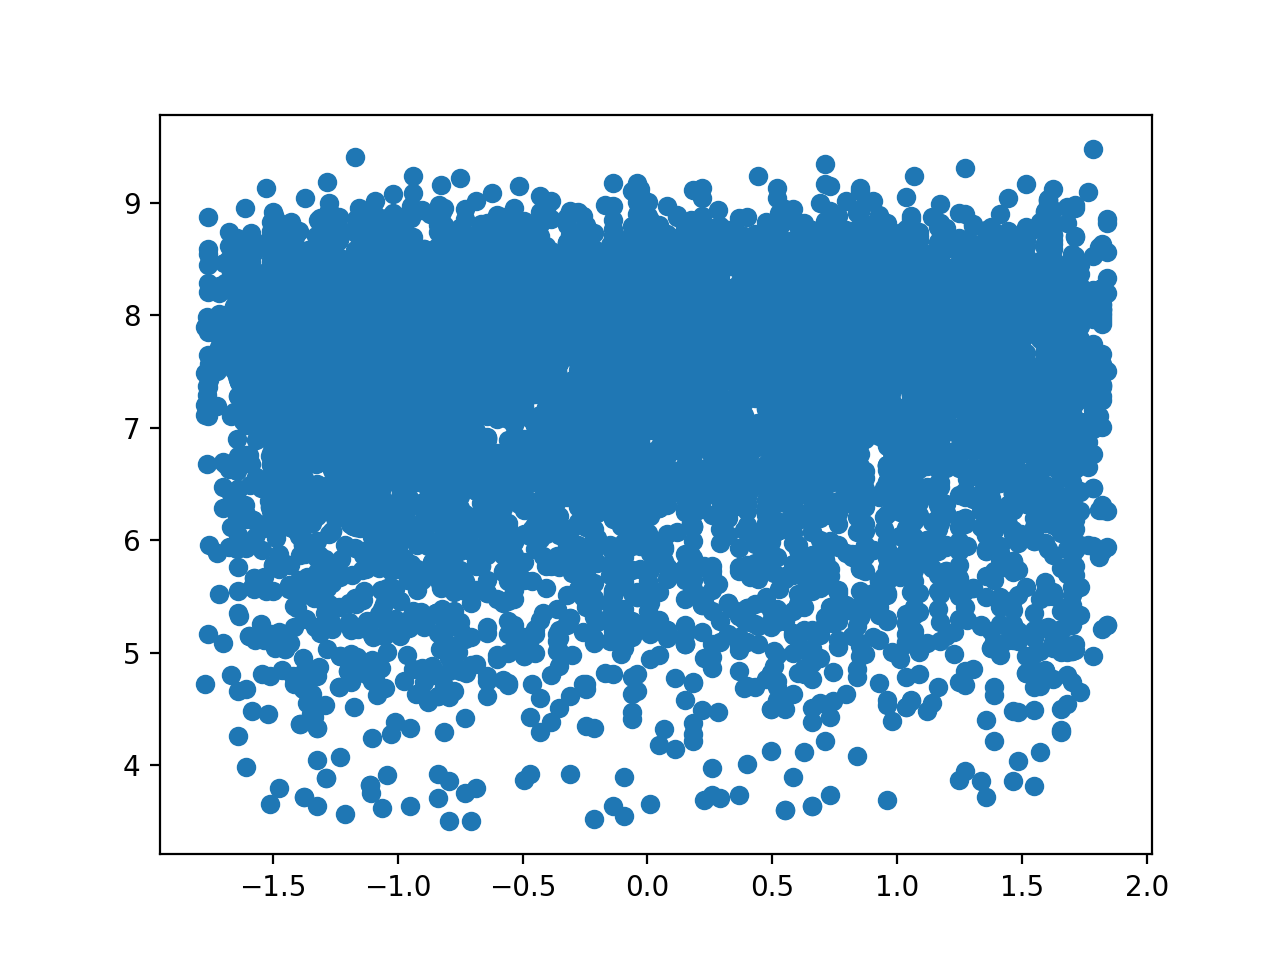

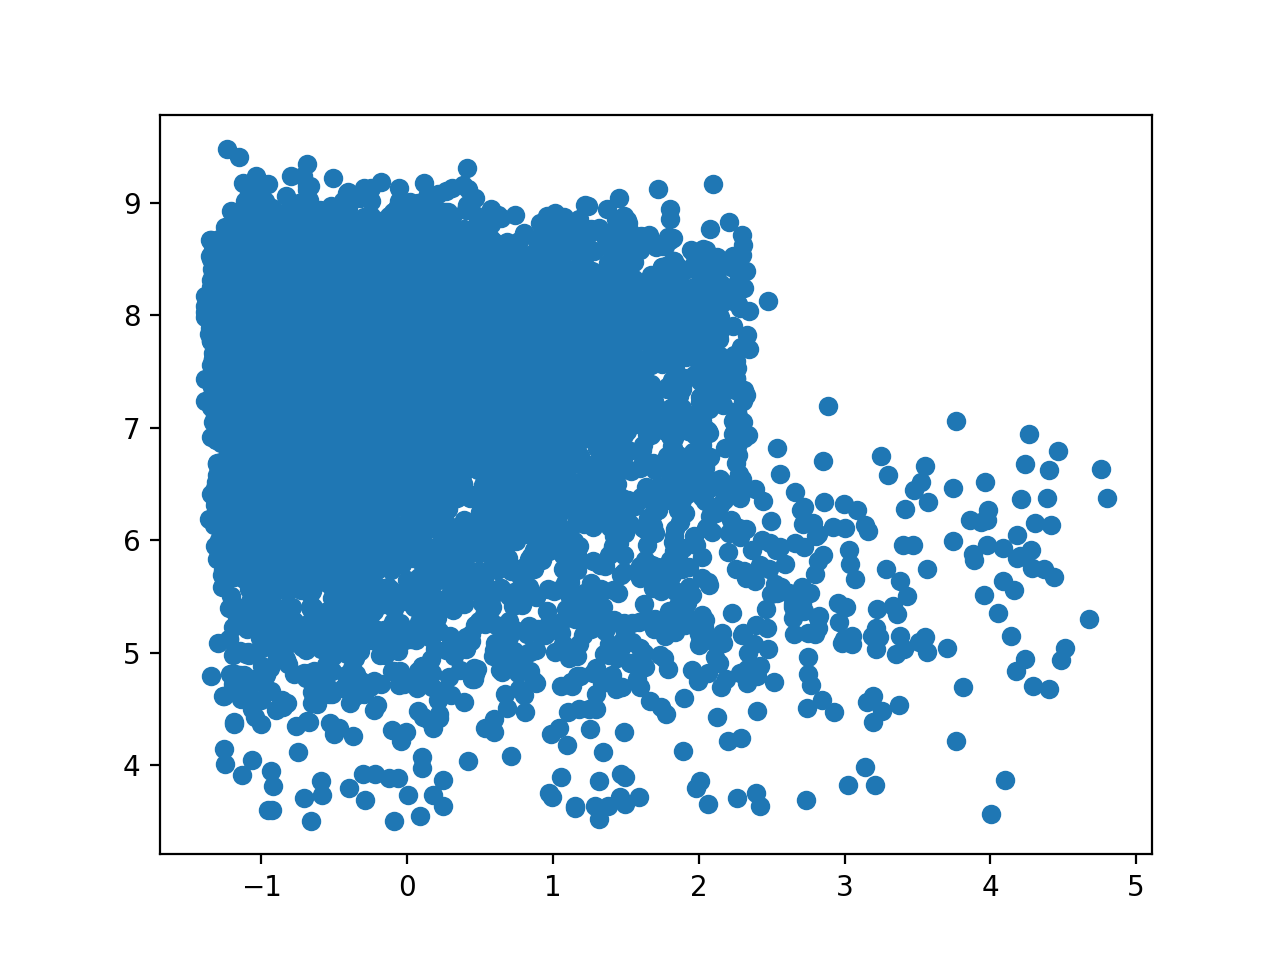

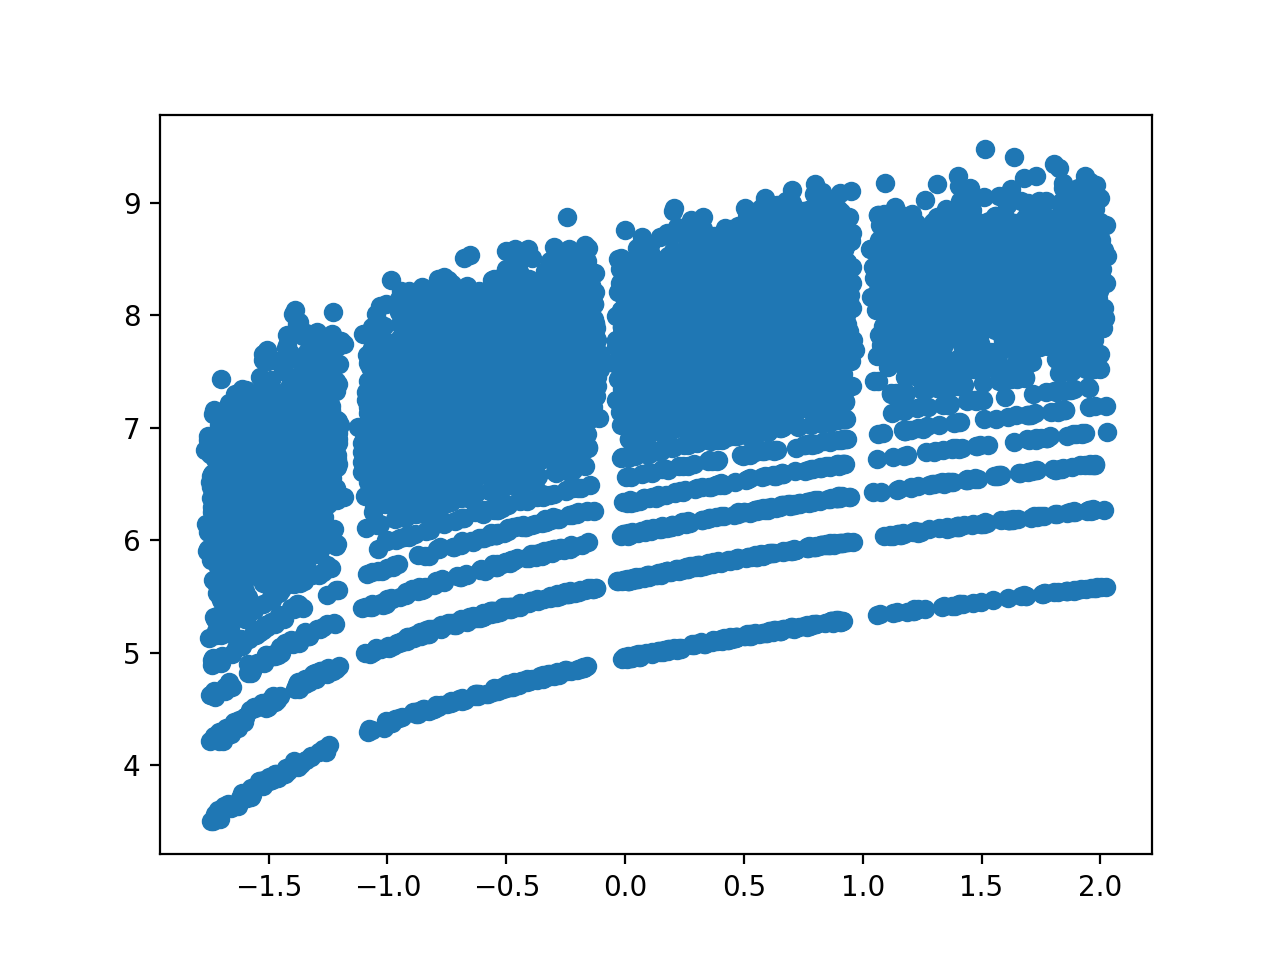

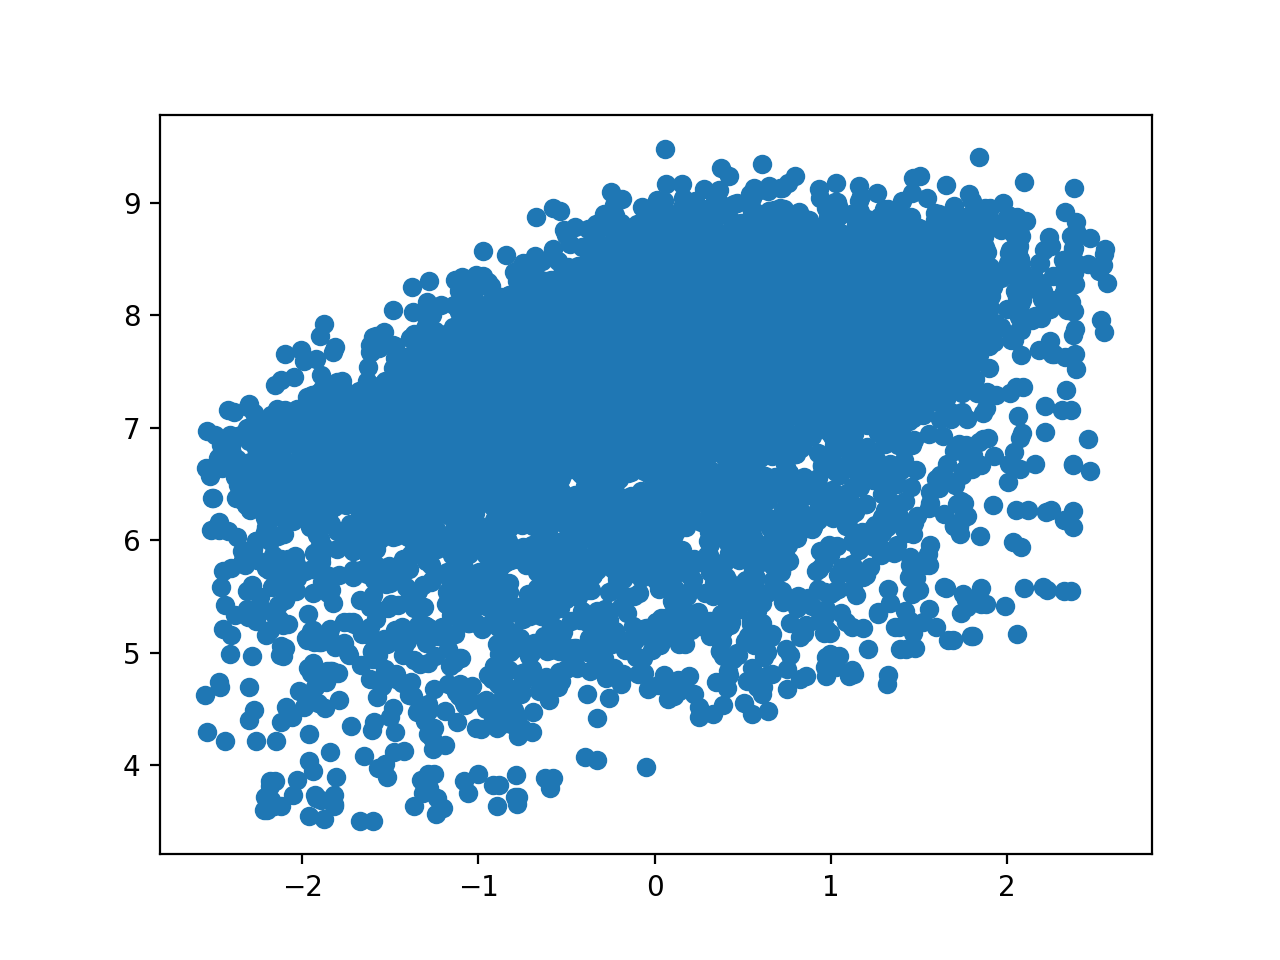

In [92]:
col1 = ['Item_Weight','Item_Visibility','Item_MRP','price_per_unit_wt']
for col in col1:
    plt.scatter(X[col],y)
    plt.show()

In [93]:
#checking error mean assumption
residuals=result.resid
np.mean(residuals)

7.417951947613987e-15

Extremely close to zero.

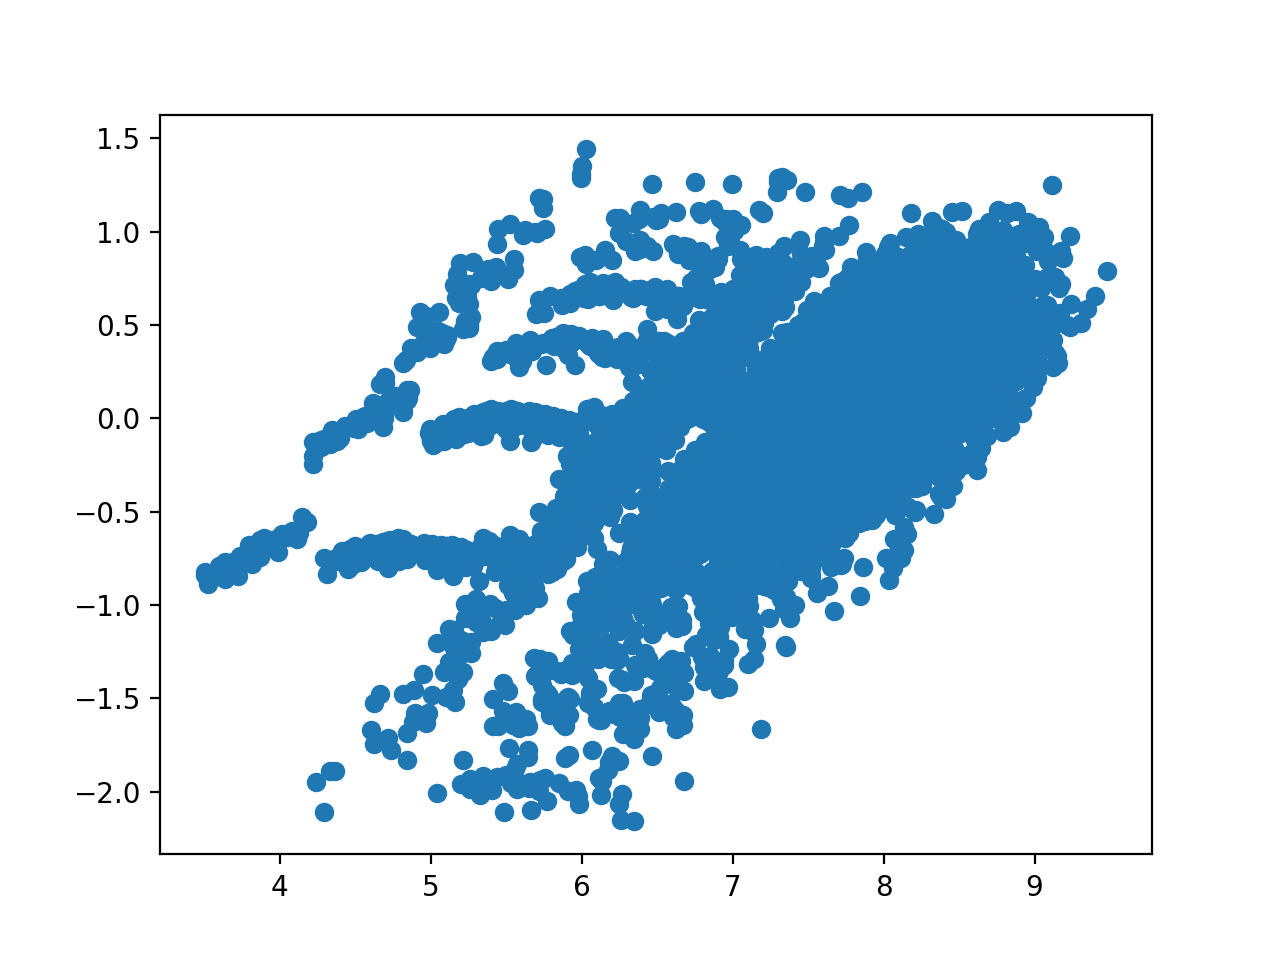

In [94]:
#Homoscedasticity
plt.scatter(y,residuals)

Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic

In [117]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test_val = het_goldfeldquandt(residuals, X)
lzip(name, test_val)

[('F statistic', 0.9434165145627551), ('p-value', 0.9710224254027415)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject the null hypothesis that error terms are homoscedastic. Good.

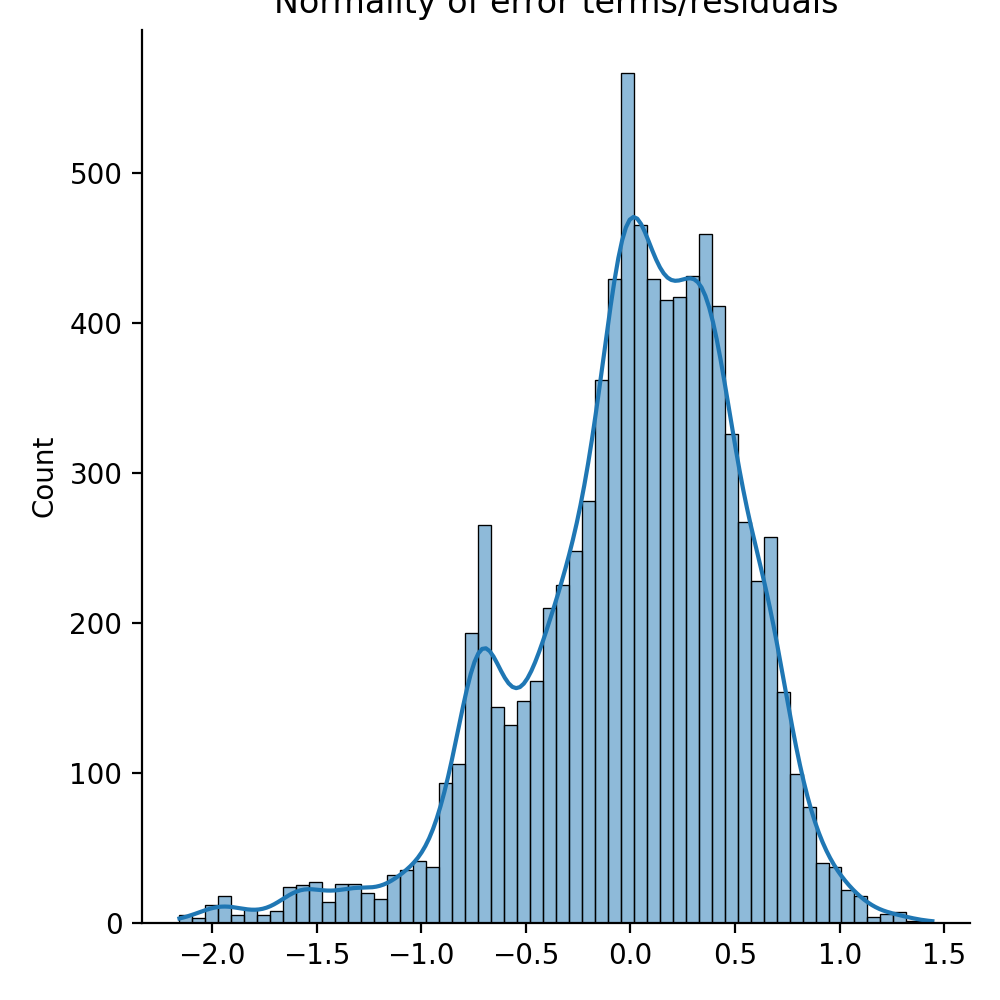

In [96]:
#Normality of error terms/residulas
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals') 

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

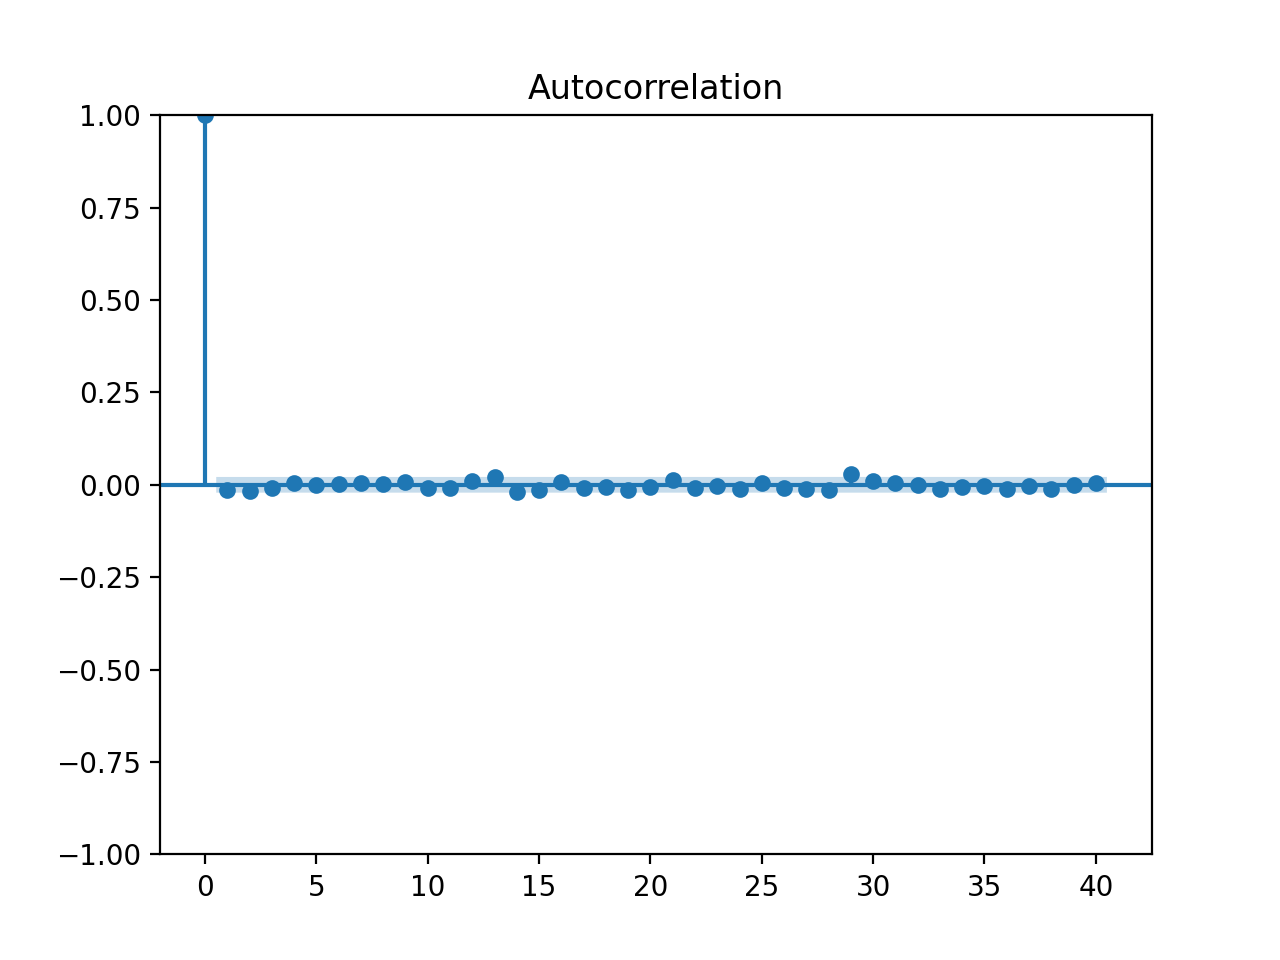

In [97]:
#No autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

No signs of autocorrelation

In [98]:
#Multicollinearity
corr_mat = df_scaled.corr()
print(corr_mat)

                               Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.000000        -0.022620  0.035751   
Item_Visibility                  -0.022620         1.000000 -0.007209   
Item_MRP                          0.035751        -0.007209  1.000000   
Outlet_Size                      -0.000512         0.088863 -0.001052   
Outlet_Location_Type             -0.001719        -0.020218  0.000838   
Outlet_Years                     -0.000247         0.082540 -0.000141   
price_per_unit_wt                -0.581025         0.001605  0.758688   
Item_Fat_Content_Non-Edible       0.057474        -0.082983  0.009151   
Item_Fat_Content_Regular         -0.033737         0.051343 -0.004019   
Outlet_Identifier_OUT013         -0.000395        -0.038481  0.000697   
Outlet_Identifier_OUT017         -0.000848        -0.035285 -0.000034   
Outlet_Identifier_OUT018          0.000771        -0.037427 -0.000023   
Outlet_Identifier_OUT019         -0.000151         

As seen earlier,Multicollinearity is present

In [105]:
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [106]:
X_train = X_train.drop(['const'], axis=1)
X_test = X_test.drop(['const'], axis=1)

### Linear Regression

Training and testing on train dataset

In [107]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred = lreg.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [110]:
print("R-squared value of Linear Regression Model is ",(r2_score(y_test, y_pred)))
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

R-squared value of Linear Regression Model is  0.7423180615309478
RMSE of Linear Regression Model is  0.5202265646793267


In [111]:
pred_table = pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred)})
pred_table.head()

Actual    Predicted
4532   479.3760   656.161394
186    657.8104   337.499112
7557   952.0940  2795.310922
6308   691.1004   467.356802
7297  4537.4270  3870.969010

Making predictions on test data

In [122]:
test_pred1 = lreg.predict(test)

In [123]:
df_pred1 = pd.DataFrame()
df_pred1['Item_Identifier'] = data_test['Item_Identifier']
df_pred1['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred1['Item_Outlet_Sales'] = np.exp(test_pred1)
df_pred1.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1600.898773
1           FDW14            OUT017        1330.760724
2           NCN55            OUT010         498.328097
3           FDQ58            OUT017        2339.564561
4           FDY38            OUT027        5649.953346

In [125]:
df_pred1.to_csv('lr_pred', index=False,header=True)

### Lasso Regression

In [126]:
from sklearn.linear_model import Lasso

# Create a range of alpha values to tune
alphas = np.arange(0.001, 0.1, 0.0002)

# Create a Lasso model
lasso = Lasso(max_iter = 500,  tol=0.1)

# Define hyperparameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Create GridSearchCV with 5-fold cross-validation
lasso_linear_reg_mod = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

# Fit the model to your training data
lasso_linear_reg_mod.fit(X_train, y_train)

# Get the best hyperparameters and the trained Lasso model
best_alpha = lasso_linear_reg_mod.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
best_lasso_model = lasso_linear_reg_mod.best_estimator_

# Use the best model to make predictions
predictions = best_lasso_model.predict(X_test)

Best alpha: 0.001


In [127]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5)
print("Cross-validated performance scores:")
print(scores)

Cross-validated performance scores:
[0.74126289 0.73801768 0.73130278 0.71899529 0.72960854]


In [128]:
print("R-squared value of Lasso Regression Model is ",(r2_score(y_test, predictions)))
from math import sqrt
print("RMSE of Lasso Regression Model is ",sqrt(mean_squared_error(y_test, predictions)))

R-squared value of Lasso Regression Model is  0.7419395514679419
RMSE of Lasso Regression Model is  0.5206085059460728


### RIdge Regression

In [135]:
from sklearn.linear_model import Ridge
# Create a range of alpha values to tune
alphas = np.arange(0.001, 0.1, 0.0002)

# Create a Ridge model
ridge = Ridge(max_iter = 500,  tol=0.1)

# Define hyperparameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Create GridSearchCV with 5-fold cross-validation
ridge_linear_reg_mod = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

# Fit the model to your training data
ridge_linear_reg_mod.fit(X_train, y_train)

# Get the best hyperparameters and the trained Ridge model
best_alpha = ridge_linear_reg_mod.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
best_ridge_model = ridge_linear_reg_mod.best_estimator_

# Use the best model to make predictions
predictions = best_ridge_model.predict(X_test)

Best alpha: 0.001


In [136]:
scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5)
print("Cross-validated performance scores:")
print(scores)

Cross-validated performance scores:
[0.74126289 0.73801768 0.73130278 0.71899529 0.72960854]


In [137]:
print("R-squared value of Ridge Regression Model is ",(r2_score(y_test, predictions)))
from math import sqrt
print("RMSE of Ridge Regression Model is ",sqrt(mean_squared_error(y_test, predictions)))

R-squared value of Ridge Regression Model is  0.7419395514679419
RMSE of Ridge Regression Model is  0.5206085059460728


Making predictions on test dataset

In [138]:
test_pred4 = best_ridge_model.predict(test)

In [139]:
df_pred4 = pd.DataFrame()
df_pred4['Item_Identifier'] = data_test['Item_Identifier']
df_pred4['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred4['Item_Outlet_Sales'] = np.exp(test_pred4)
df_pred4.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1553.090984
1           FDW14            OUT017        1303.592010
2           NCN55            OUT010         541.275156
3           FDQ58            OUT017        2227.461564
4           FDY38            OUT027        5701.876620

In [134]:
df_pred4.to_csv('ridge_pred', index=False,header=True)



### Random Forest Regressor

In [140]:
X = train.drop("Item_Outlet_Sales", axis=1)
y = train["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [141]:
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [400],
    'max_features': list(range(3, 11)),
    'min_samples_split': [10, 15, 20],
    }

# Create a Random Forest regression model
rf_model = RandomForestRegressor()

# Create a grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_rf_model = grid_search.best_estimator_
best_max_features = grid_search.best_params_['max_features']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# cross-validated performance scores
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

# best hyperparameters
print(f"Best max_features: {best_max_features}")
print(f"Best min_samples_split: {best_min_samples_split}")

#cross-validated performance scores
print("Cross-validated performance scores:")
print(scores)

Best max_features: 5
Best min_samples_split: 20
Cross-validated performance scores:
[0.60835804 0.57364632 0.57051656 0.57340024 0.5919795 ]


In [142]:
rf_model_tuned =  RandomForestRegressor(n_estimators=400, max_features =6, min_samples_split=20)
rf_model_tuned.fit(X_train,y_train)
pred_rf = rf_model_tuned.predict(X_test)

In [143]:
feature_importances = pd.DataFrame({'values' : rf_model_tuned.feature_importances_, 'feature names' : X_train.columns})
#feature_importances.sort_values(ascending=True, inplace=True)
feature_importances


values                  feature names
0   0.037832                    Item_Weight
1   0.043512                Item_Visibility
2   0.252587                       Item_MRP
3   0.028166                    Outlet_Size
4   0.017447           Outlet_Location_Type
5   0.056602                   Outlet_Years
6   0.131764              price_per_unit_wt
7   0.002218    Item_Fat_Content_Non-Edible
8   0.004404       Item_Fat_Content_Regular
9   0.003694       Outlet_Identifier_OUT013
10  0.002152       Outlet_Identifier_OUT017
11  0.009511       Outlet_Identifier_OUT018
12  0.045260       Outlet_Identifier_OUT019
13  0.054063       Outlet_Identifier_OUT027
14  0.002766       Outlet_Identifier_OUT035
15  0.001736       Outlet_Identifier_OUT045
16  0.003262       Outlet_Identifier_OUT046
17  0.001640       Outlet_Identifier_OUT049
18  0.068778  Outlet_Type_Supermarket Type1
19  0.009261  Outlet_Type_Supermarket Type2
20  0.056388  Outlet_Type_Supermarket Type3
21  0.004522         Item_Type_new_not_sure
22  0.004623       Item_Type_new_perishable
23  0.003551               Item_category_FD
24  0.002178               Item_category_NC
25  0.026421          Item_MRP_clusters_2nd
26  0.035555          Item_MRP_clusters_3rd
27  0.090106          Item_MRP_clusters_4th

In [144]:
print("R-squared value of Random Forest Regressor Model is ",(r2_score(y_test, pred_rf)))
from math import sqrt
print("RMSE of Random Forest Regressor Model is ",sqrt(mean_squared_error(y_test, pred_rf)))

R-squared value of Random Forest Regressor Model is  0.6030177304082857
RMSE of Random Forest Regressor Model is  1095.0401465723714


Making predictions on test dataset

In [145]:
test_pred2 = rf_model_tuned.predict(test)

In [146]:
df_pred2 = pd.DataFrame()
df_pred2['Item_Identifier'] = data_test['Item_Identifier']
df_pred2['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred2['Item_Outlet_Sales'] = (test_pred2)
df_pred2.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1713.882583
1           FDW14            OUT017        1560.341082
2           NCN55            OUT010         794.546863
3           FDQ58            OUT017        2400.090664
4           FDY38            OUT027        5535.520713

In [147]:
df_pred2.to_csv('rf_pred', index=False,header=True)

### XGBoost Regressor

In [148]:
import xgboost as xgb

# Define the parameter grid for hyperparameter tuning
params_list = {
    'eta': 0.01,
    'gamma': 1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.5
}

# Create DMatrix objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
# Perform cross-validation with early stopping
cv_results = xgb.cv(
    params=params_list,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,  # Number of folds for cross-validation
    metrics='rmse',  # Evaluation metric (root mean squared error)
    early_stopping_rounds=30,
    verbose_eval=10,  # Print evaluation results every 10 rounds
    maximize=False  # Set to False if minimizing the evaluation metric
)

[0]	train-rmse:1682.23986+18.90826	test-rmse:1681.27677+75.13167
[10]	train-rmse:1598.00038+17.33039	test-rmse:1600.10753+71.76432
[20]	train-rmse:1527.53955+15.97677	test-rmse:1533.00699+68.39902
[30]	train-rmse:1458.70690+14.49546	test-rmse:1467.59721+65.52246
[40]	train-rmse:1406.25520+13.42100	test-rmse:1419.23873+63.00598
[50]	train-rmse:1358.99202+12.53272	test-rmse:1375.91888+60.57857
[60]	train-rmse:1312.74586+11.70168	test-rmse:1333.68754+57.80854
[70]	train-rmse:1272.59855+10.72804	test-rmse:1297.37208+55.47659
[80]	train-rmse:1239.22708+9.96794	test-rmse:1268.31944+53.89964
[90]	train-rmse:1207.43079+9.19185	test-rmse:1240.48510+52.23890
[100]	train-rmse:1180.02220+8.72237	test-rmse:1217.27466+50.39114
[110]	train-rmse:1156.83815+8.40325	test-rmse:1197.56456+48.67607
[120]	train-rmse:1137.52019+8.15515	test-rmse:1182.02392+47.60529
[130]	train-rmse:1117.62092+7.75880	test-rmse:1166.37840+46.53356
[140]	train-rmse:1101.37737+7.46409	test-rmse:1154.06323+45.24319
[150]	train-r

In [149]:
# Train the XGBoost model
xgb_model = xgb.train(
    params=params_list,
    dtrain=dtrain,
    num_boost_round=399
)

In [150]:
y_test_pred = xgb_model.predict(dtest)

In [151]:
print("R-squared value of XGBoost Regressor Model is ",(r2_score(y_test, y_test_pred)))
from math import sqrt
print("RMSE of XGBoost Regressor Model is ",sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared value of XGBoost Regressor Model is  0.6045533384345274
RMSE of XGBoost Regressor Model is  1092.9201756487464


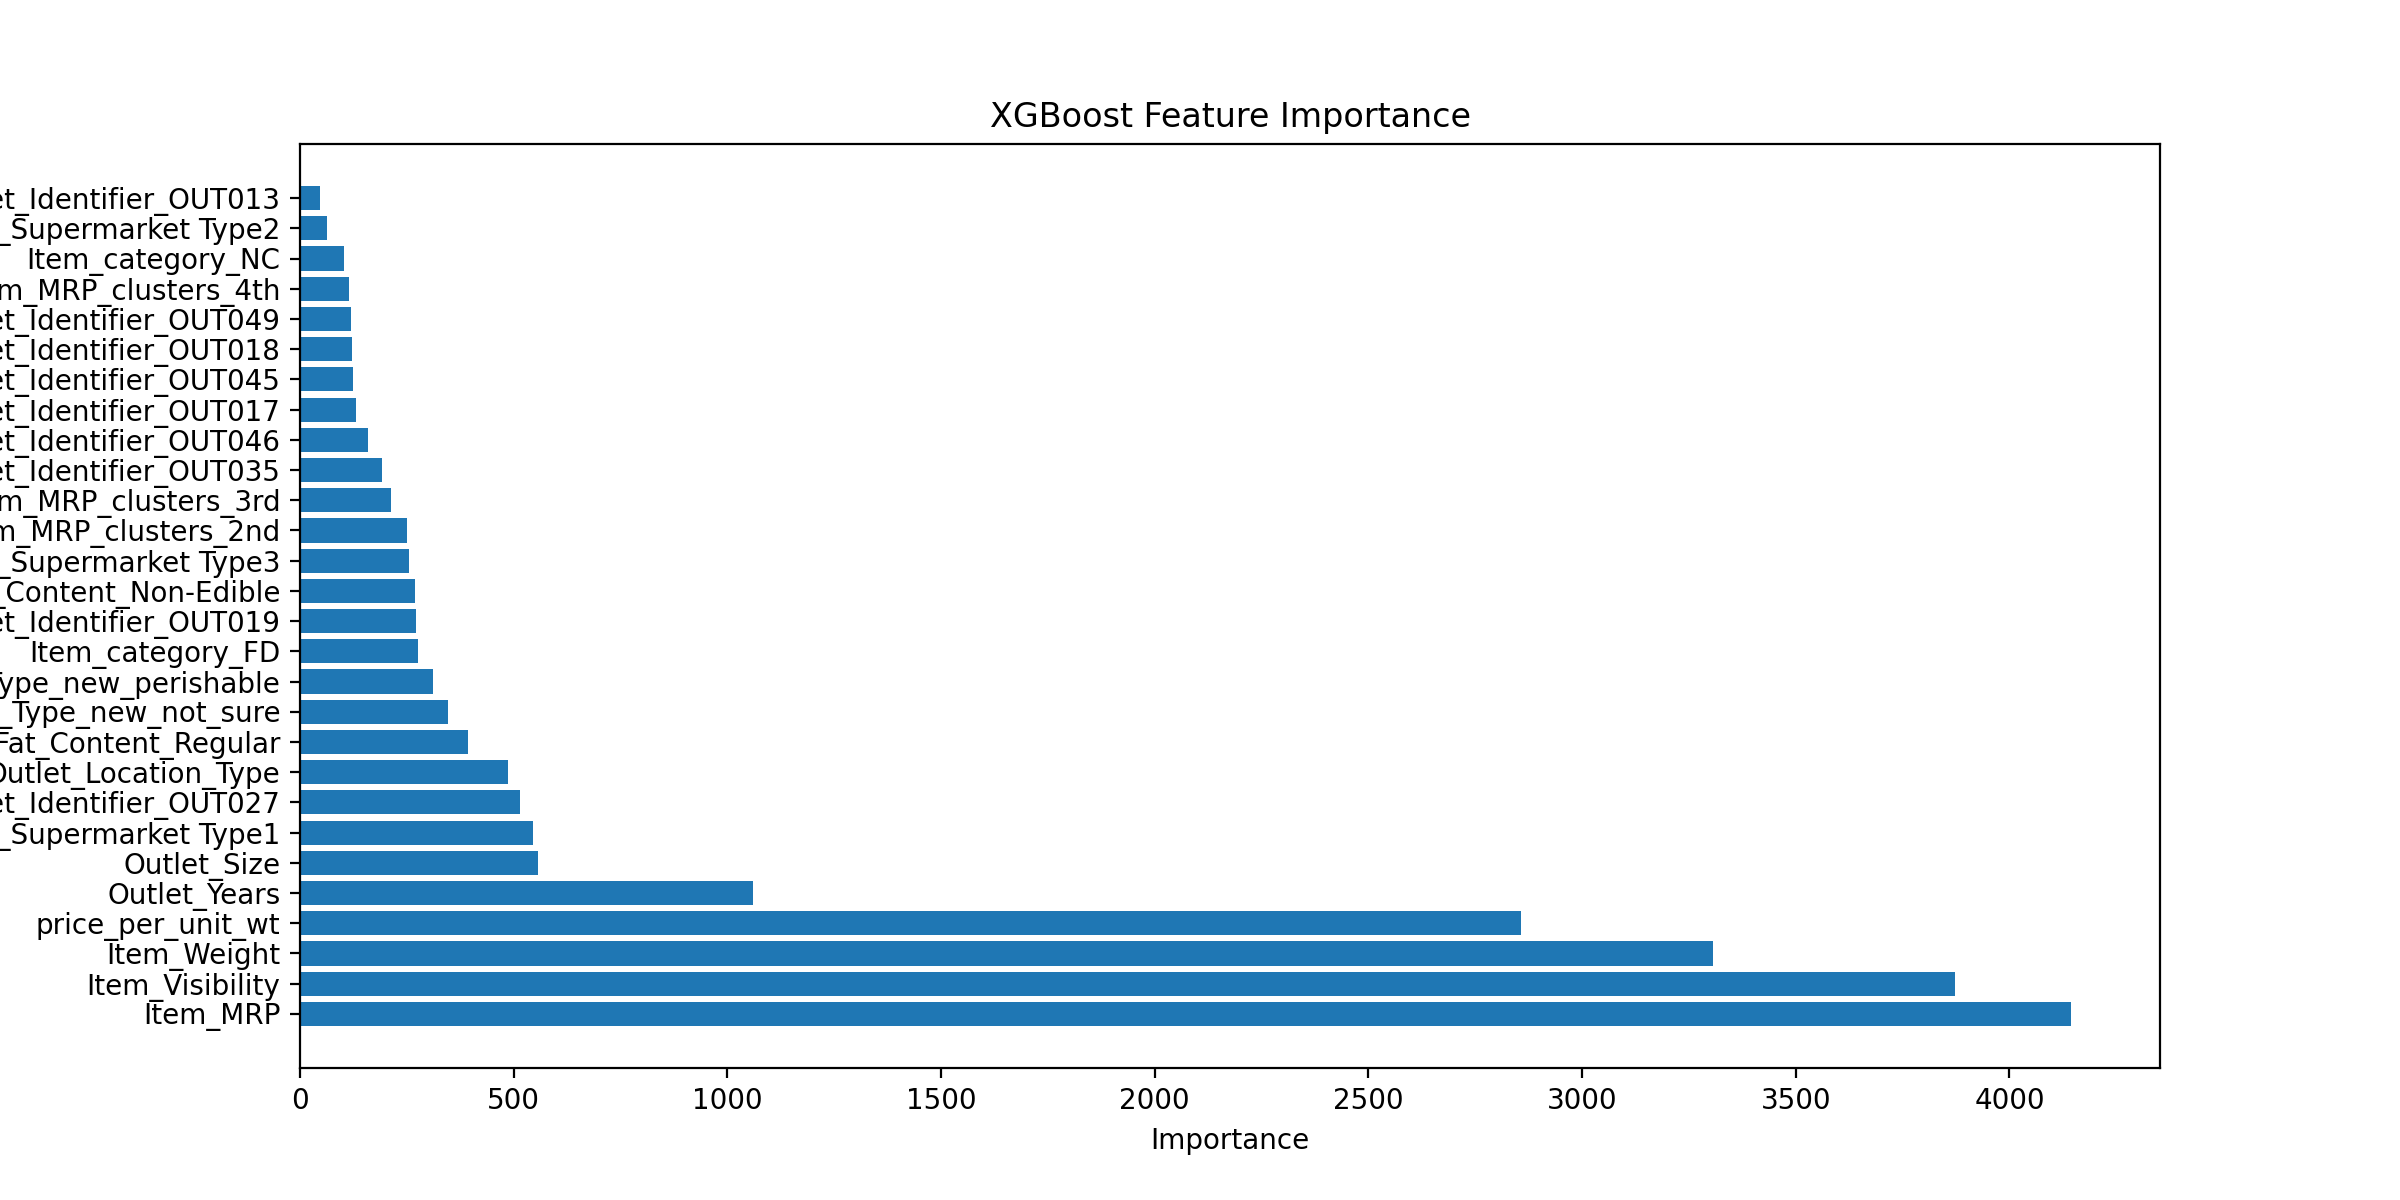

In [152]:
#Feature Importance
feature_names = list(X_train.columns)
feature_imp = xgb_model.get_fscore()
feature_imp_df = pd.DataFrame(list(feature_imp.items()), columns=['Feature', 'Importance'])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

Making Prediction on test dataset

In [153]:
dtest1 = xgb.DMatrix(data=test)
xgb_pred = xgb_model.predict(dtest1)

In [154]:
df_pred3 = pd.DataFrame()
df_pred3['Item_Identifier'] = data_test['Item_Identifier']
df_pred3['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred3['Item_Outlet_Sales'] = xgb_pred
df_pred3.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1664.736572
1           FDW14            OUT017        1470.964844
2           NCN55            OUT010         795.459595
3           FDQ58            OUT017        2512.006104
4           FDY38            OUT027        5907.431152

In [155]:
df_pred3.to_csv('xgb_pred', index=False,header=True)

# Conclusion :
The model that is performing best is XGBoost Regressor followed by Random Forest Regressor.